In [1]:
 !pip install optuna
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import pickle
import json
import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('/content/Overall Dataset.csv')

In [3]:
columns = df1.columns.unique()
print(columns)

Index(['S.No', 'Cell_Line', 'Drug_Name', 'Pubchem_CID', '#stars', '#amine',
       '#amidine', '#acid', '#amide', '#rotor', '#rtvFG', 'CNS', 'mol_MW',
       'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA', 'volume', 'donorHB',
       'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob', 'QPpolrz', 'QPlogPC16',
       'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS', 'CIQPlogS', 'QPlogHERG',
       'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp', 'IP(eV)', 'EA(eV)',
       '#metab', 'QPlogKhsa', 'HumanOralAbsorption',
       'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO',
       'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm',
       'RuleOfThree', 'Jm', 'Labels'],
      dtype='object')


In [4]:
statistics = df1.describe()
statistics

S.No       #stars       #amine     #amidine        #acid  \
count  1761.000000  1761.000000  1761.000000  1761.000000  1761.000000   
mean    176.690517     1.182283     0.389551     0.009654     0.085179   
std     101.858286     2.388239     0.601498     0.097805     0.371746   
min       1.000000     0.000000     0.000000     0.000000     0.000000   
25%      89.000000     0.000000     0.000000     0.000000     0.000000   
50%     177.000000     0.000000     0.000000     0.000000     0.000000   
75%     265.000000     1.000000     1.000000     0.000000     0.000000   
max     366.000000    18.000000     3.000000     1.000000     4.000000   

            #amide       #rotor       #rtvFG          CNS       mol_MW  ...  \
count  1761.000000  1761.000000  1761.000000  1761.000000  1761.000000  ...   
mean      0.211244     6.139693     0.401476    -0.830778   437.369601  ...   
std       0.752049     4.407872     0.869677     1.166671   139.355083  ...   
min       0.000000     0.000000     0.000000    -2.000000   123.111000  ...   
25%       0.000000     3.000000     0.000000    -2.000000   361.486000  ...   
50%       0.000000     5.000000     0.000000    -1.000000   432.377000  ...   
75%       0.000000     8.000000     1.000000     0.000000   499.543000  ...   
max       8.000000    35.000000     7.000000     2.000000  1255.432000  ...   

               PSA       #NandO   RuleOfFive   #ringatoms        #in34  \
count  1761.000000  1761.000000  1761.000000  1761.000000  1761.000000   
mean    102.540793     7.357183     0.558773    20.512777     0.264622   
std      41.293828     2.872512     0.859495     7.634400     0.941676   
min      13.663000     1.000000     0.000000     0.000000     0.000000   
25%      78.264000     6.000000     0.000000    15.000000     0.000000   
50%      96.248000     7.000000     0.000000    21.000000     0.000000   
75%     117.570000     9.000000     1.000000    25.000000     0.000000   
max     351.694000    28.000000     3.000000    45.000000     6.000000   

             #in56      #noncon     #nonHatm  RuleOfThree           Jm  
count  1761.000000  1761.000000  1761.000000  1761.000000  1761.000000  
mean     19.971039     3.291312    30.914253     0.599659     5.176886  
std       7.687339     3.928448    10.033921     0.687866    80.205053  
min       0.000000     0.000000     9.000000     0.000000     0.000000  
25%      15.000000     0.000000    26.000000     0.000000     0.000000  
50%      21.000000     3.000000    30.000000     1.000000     0.002000  
75%      24.000000     5.000000    35.000000     1.000000     0.021000  
max      45.000000    26.000000    90.000000     3.000000  1499.233000  

[8 rows x 52 columns]

In [5]:
Ll = LabelEncoder()
df1['Labels'] = Ll.fit_transform(df1['Labels'])
print("Labels",df1['Labels'].unique())
print(Ll.inverse_transform(list(df1['Labels'].unique())))
print()

Labels [0 1]
['Active' 'Inactive']



In [6]:
Ll = LabelEncoder()
df1['Cell_Line'] = Ll.fit_transform(df1['Cell_Line'])
print("Cell_Line",df1['Cell_Line'].unique())
print(Ll.inverse_transform(list(df1['Cell_Line'].unique())))
print()

Cell_Line [1 2 3 4 0]
['HCC-78' 'NCI-H322' 'NCI-H358' 'NCI-H522' 'CaLu-06']



In [7]:
df1 = df1.drop('S.No', axis=1)
df1 = df1.drop('Pubchem_CID',axis=1)
df1 = df1.drop('Drug_Name',axis=1)

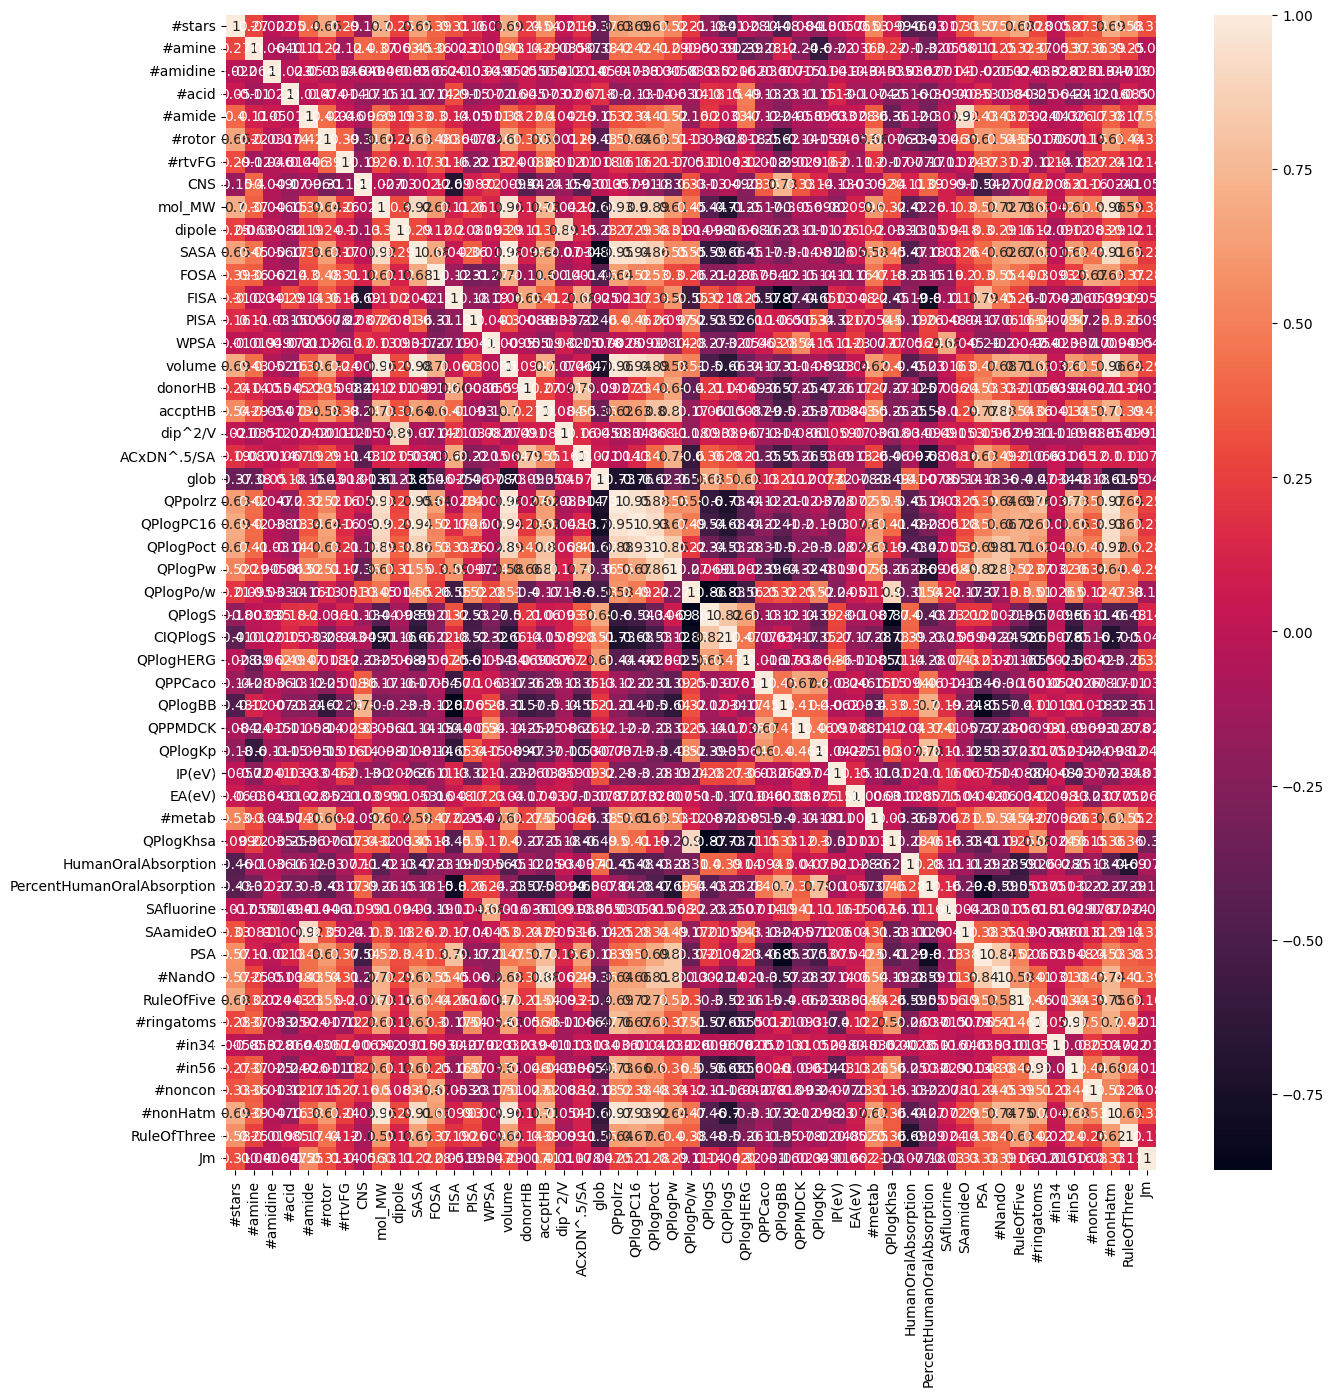

Top 15 positively correlated features:
volume      SASA          0.980267
SASA        volume        0.980267
#in56       #ringatoms    0.974905
#ringatoms  #in56         0.974905
#nonHatm    QPpolrz       0.967814
QPpolrz     #nonHatm      0.967814
volume      QPpolrz       0.964407
QPpolrz     volume        0.964407
mol_MW      #nonHatm      0.964148
#nonHatm    mol_MW        0.964148
mol_MW      volume        0.962550
volume      mol_MW        0.962550
#nonHatm    volume        0.959702
volume      #nonHatm      0.959702
SASA        QPpolrz       0.954323
dtype: float64


In [8]:
plt.figure(figsize=(15, 15))
sns.heatmap(df1[['#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG',
               'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA',
               'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob',
               'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS',
               'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp',
               'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption',
               'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO',
               'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm',
               'RuleOfThree', 'Jm']].corr(), annot=True)
plt.show()

correlation_matrix = df1.corr()
top_positive_correlations = correlation_matrix.unstack().sort_values(ascending=False)

top_positive_correlations = top_positive_correlations[top_positive_correlations != 1]

top_15_positive_features = top_positive_correlations.head(15)

print("Top 15 positively correlated features:")
print(top_15_positive_features)


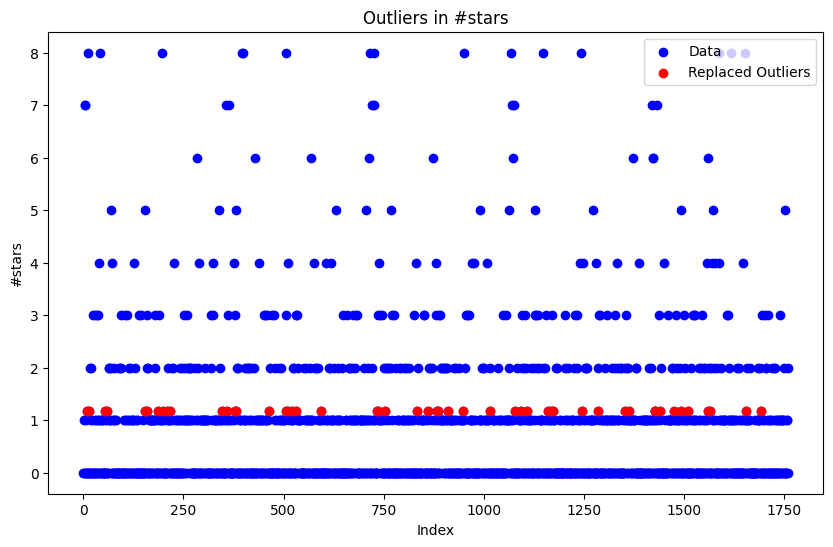

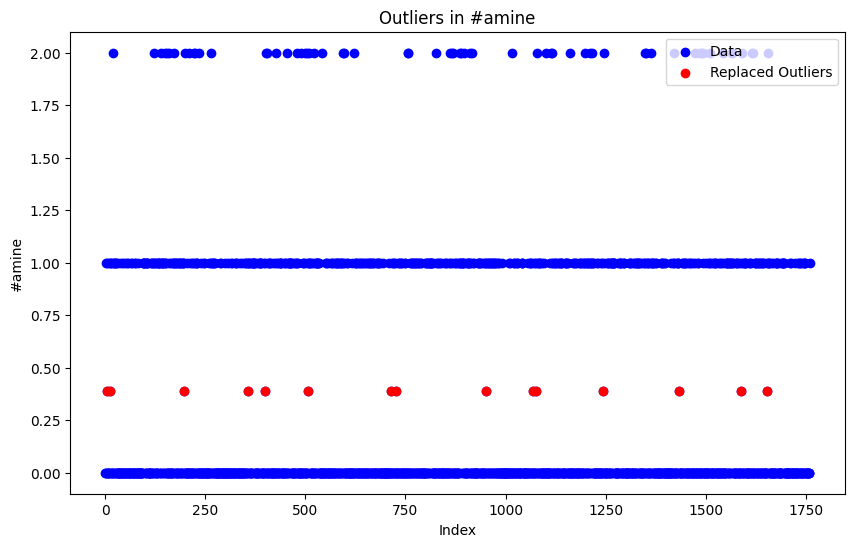

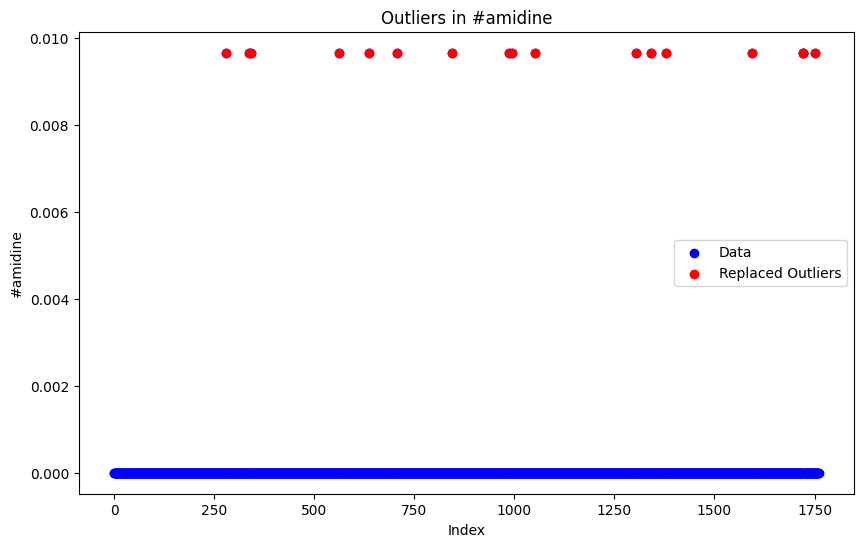

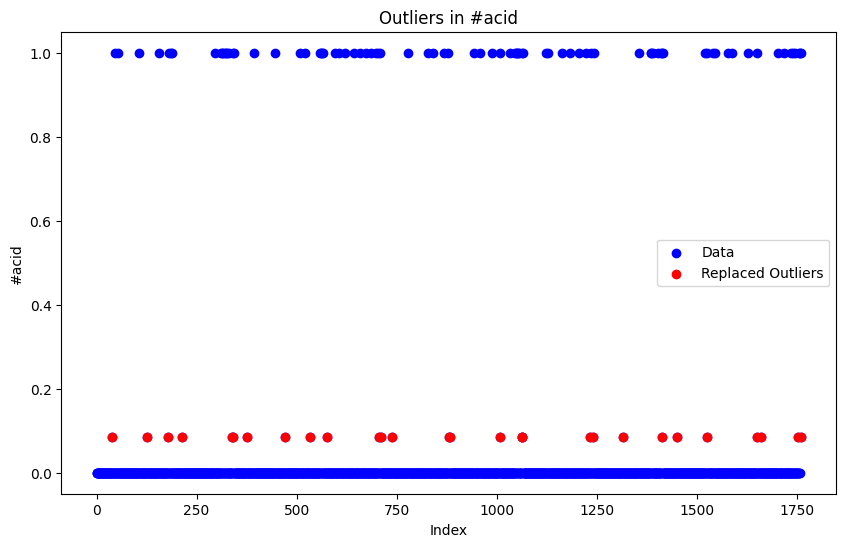

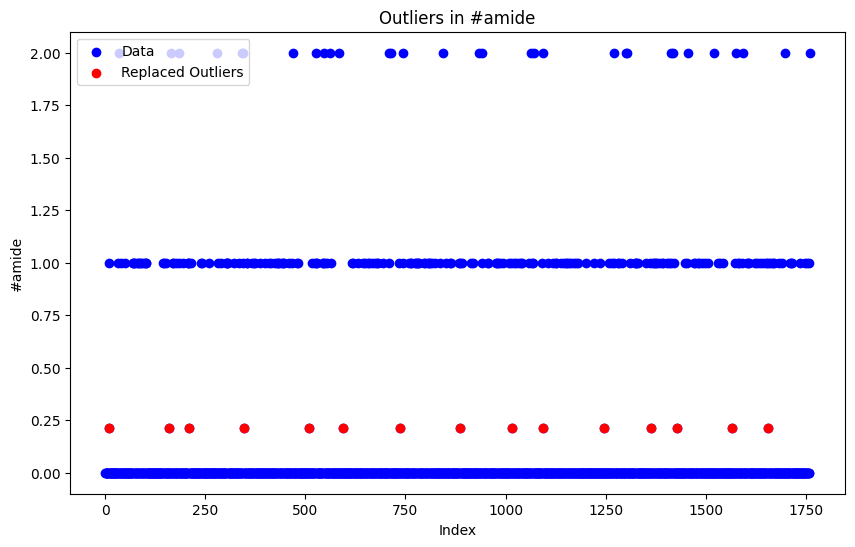

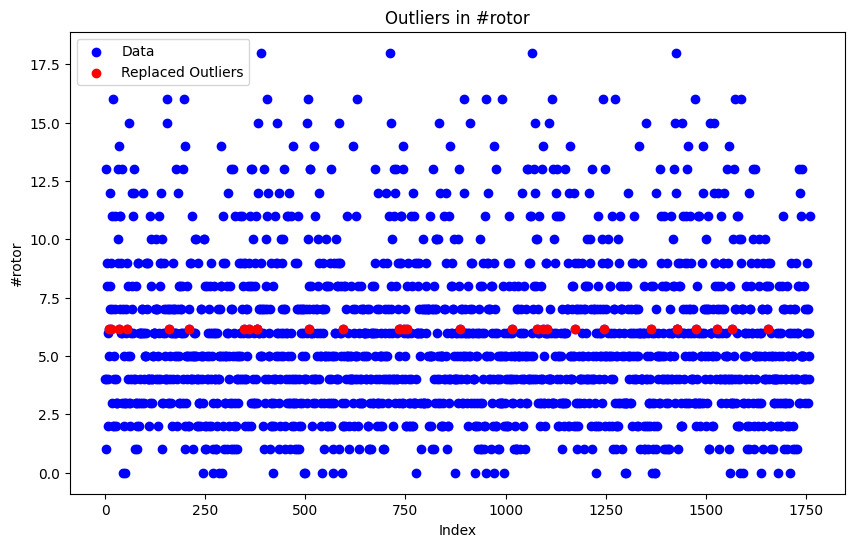

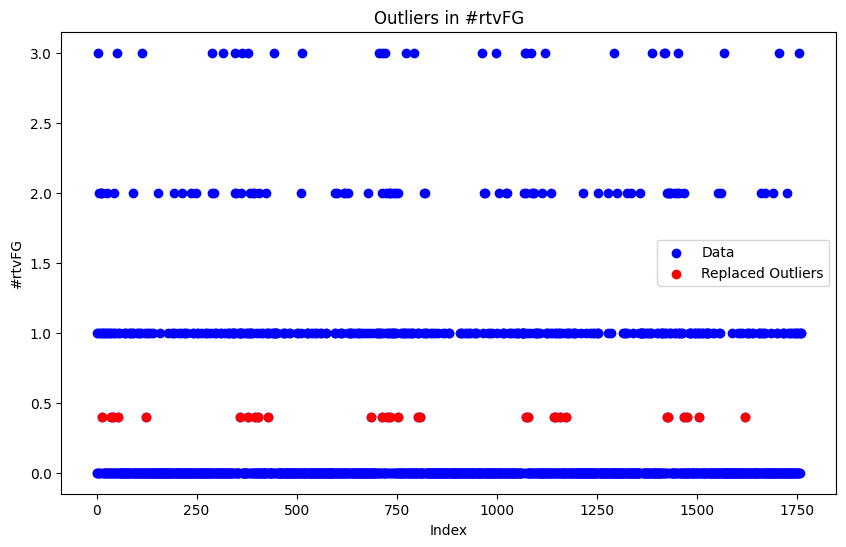

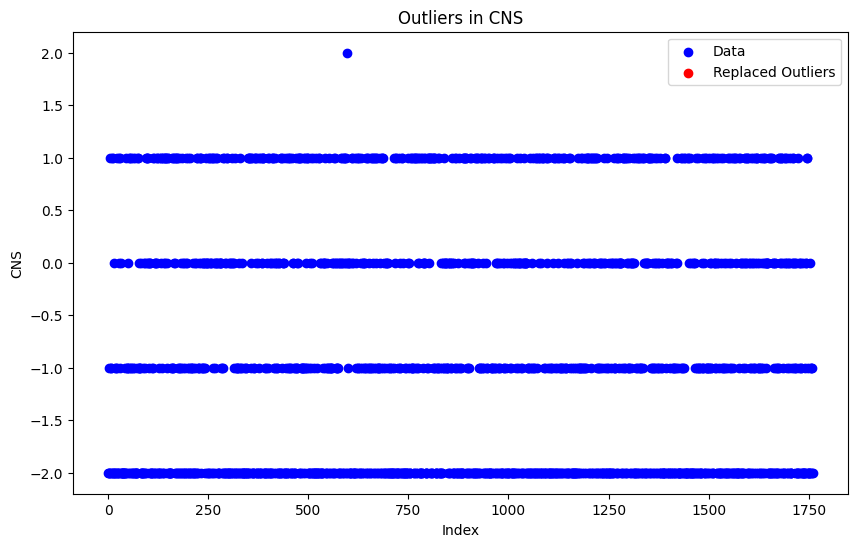

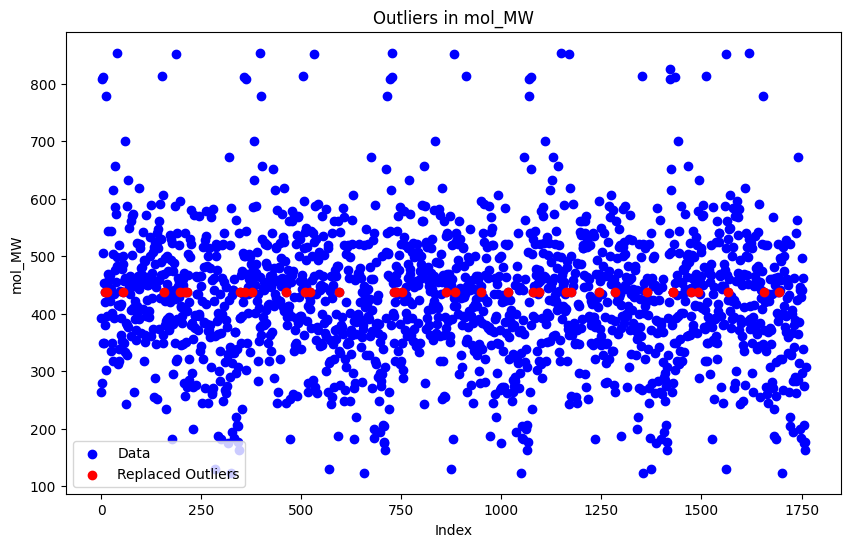

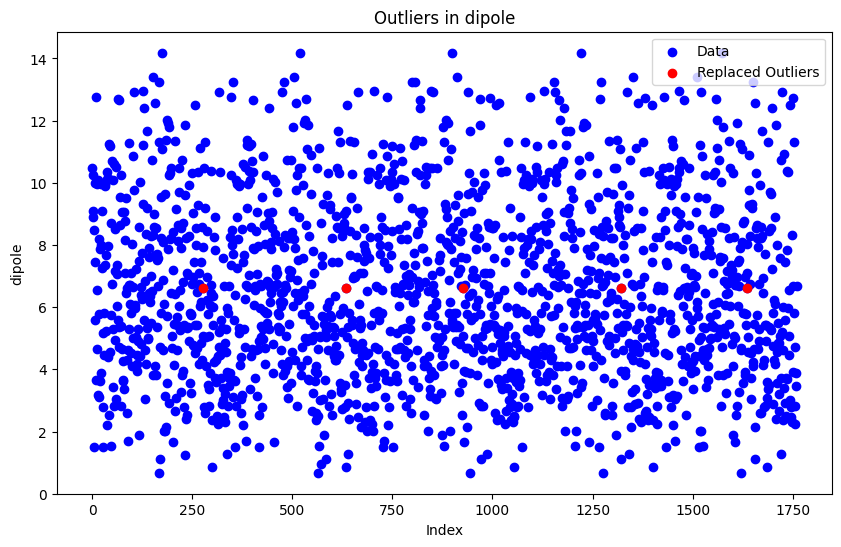

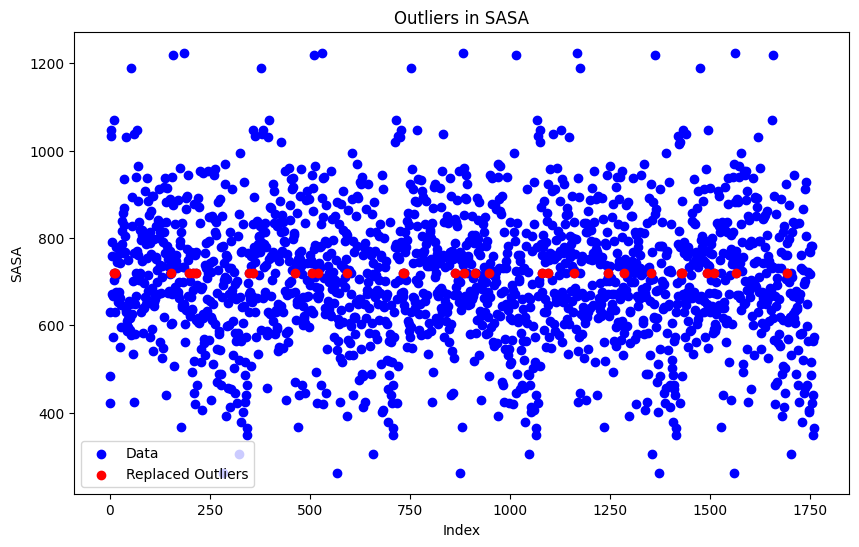

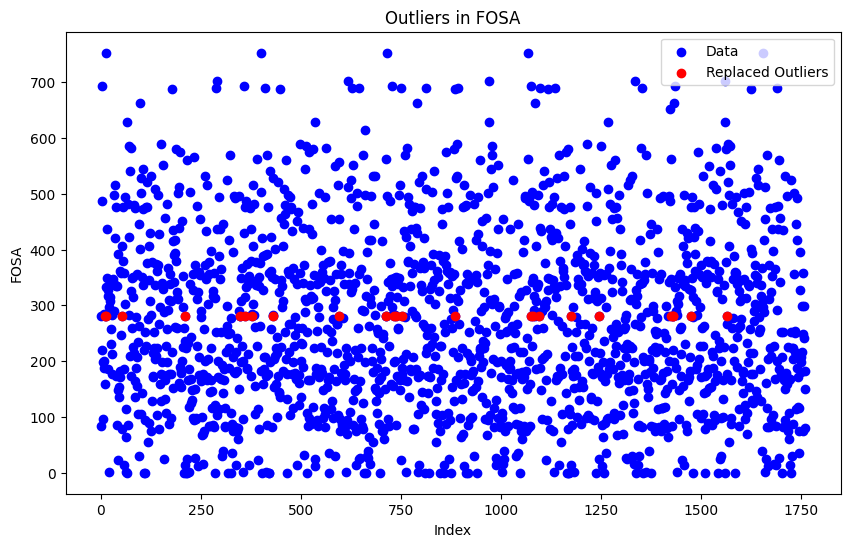

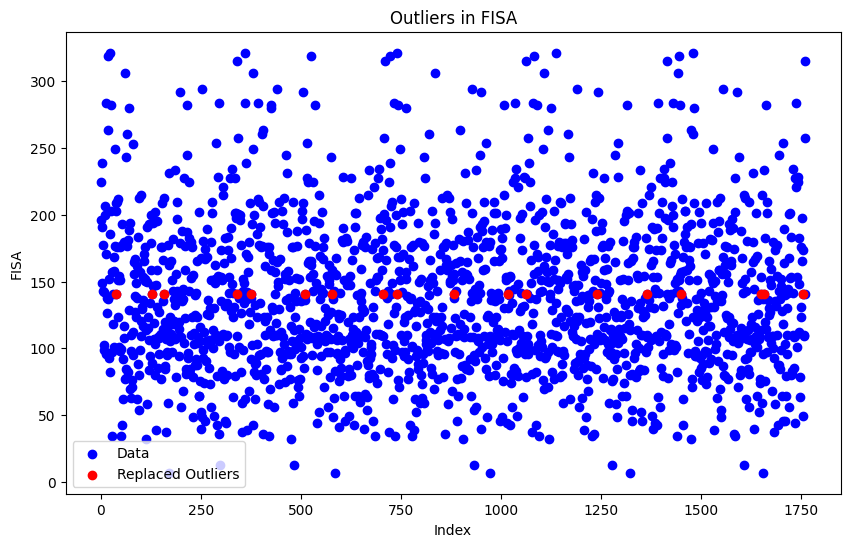

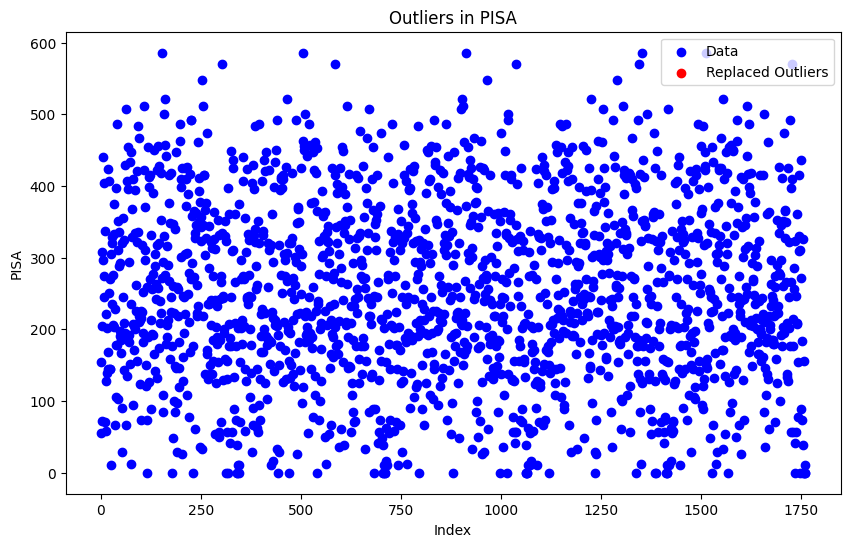

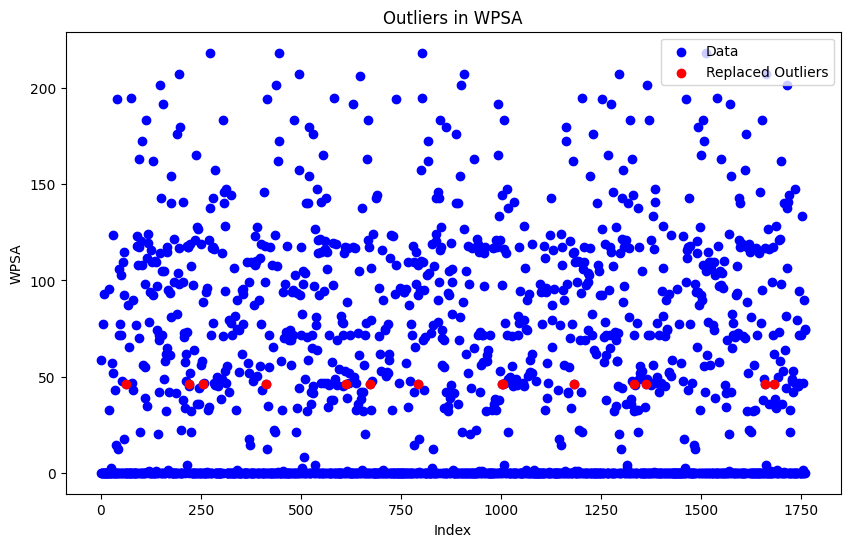

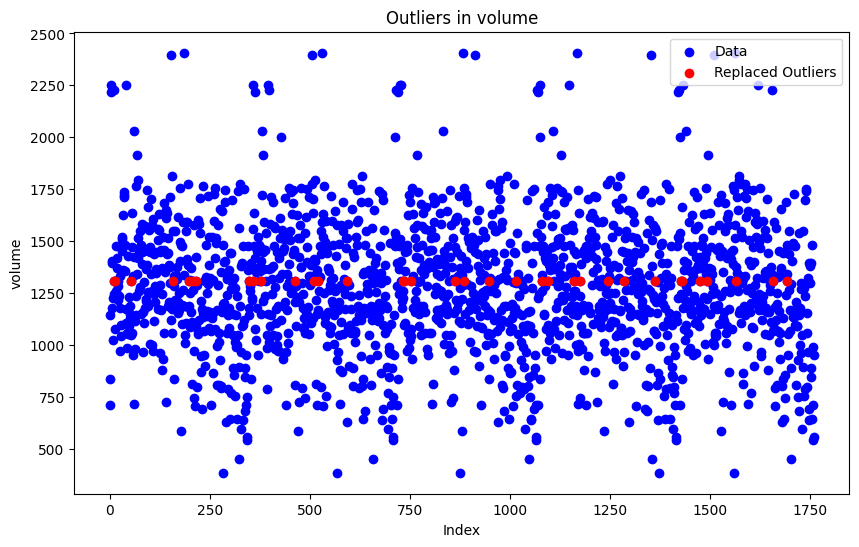

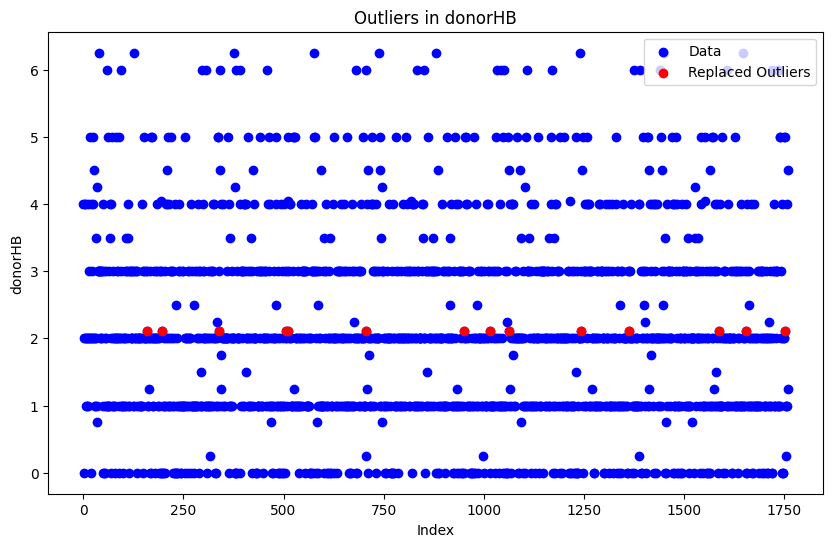

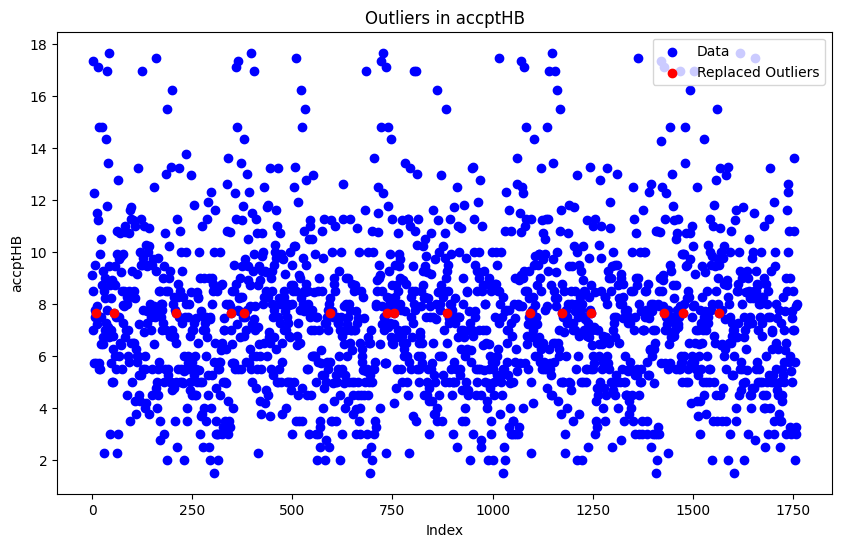

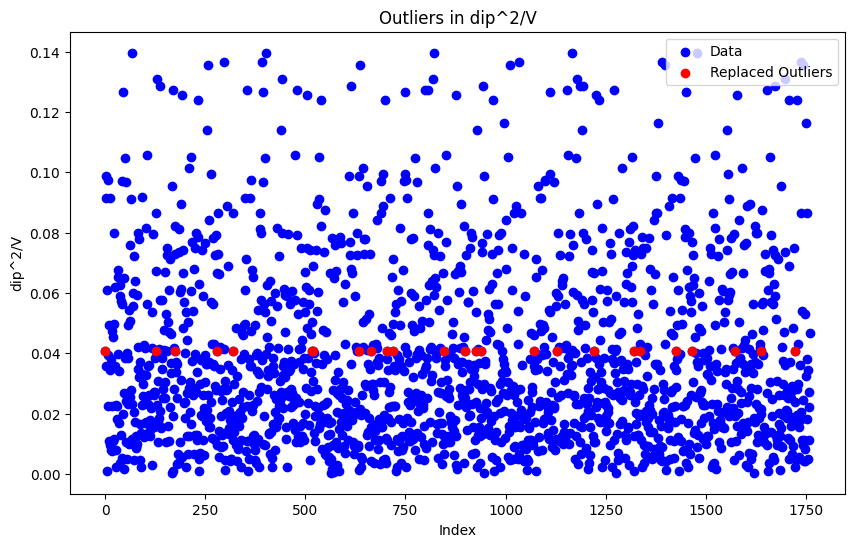

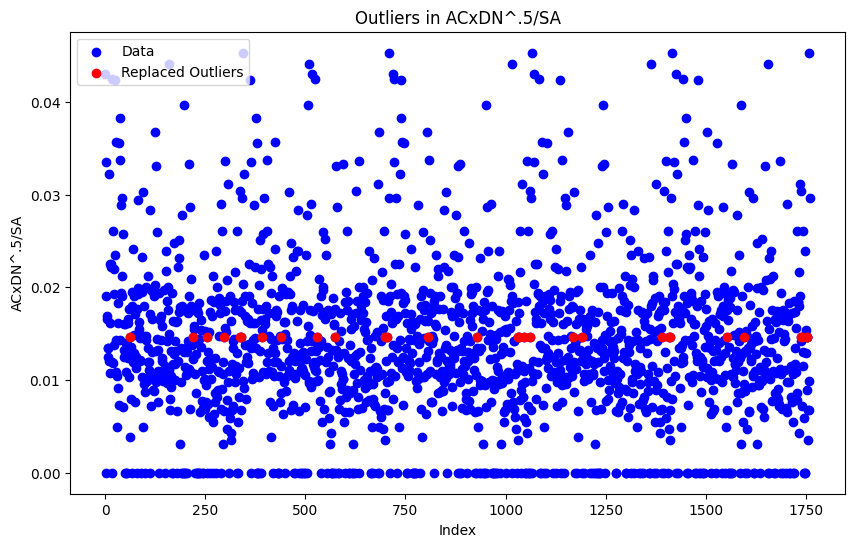

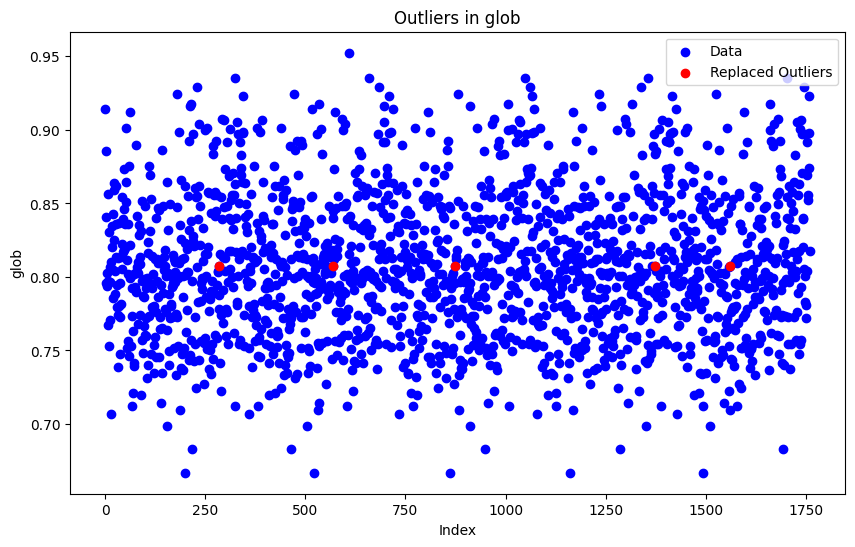

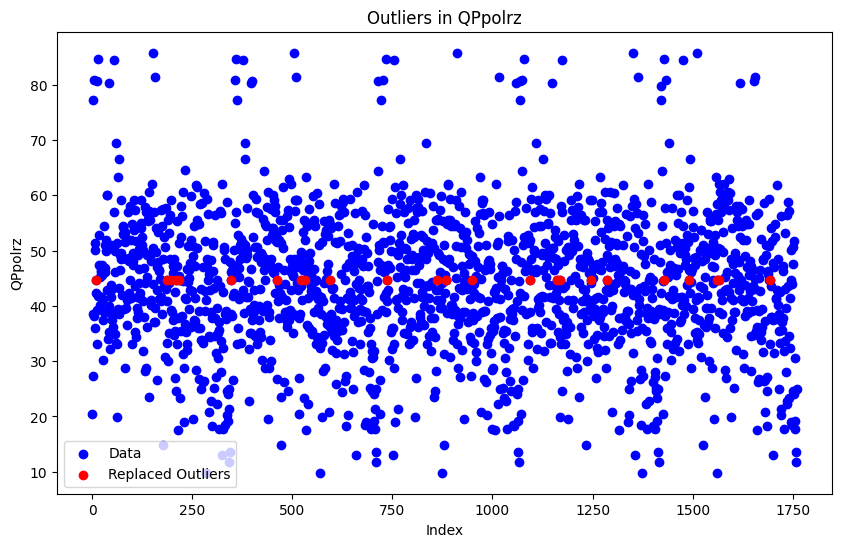

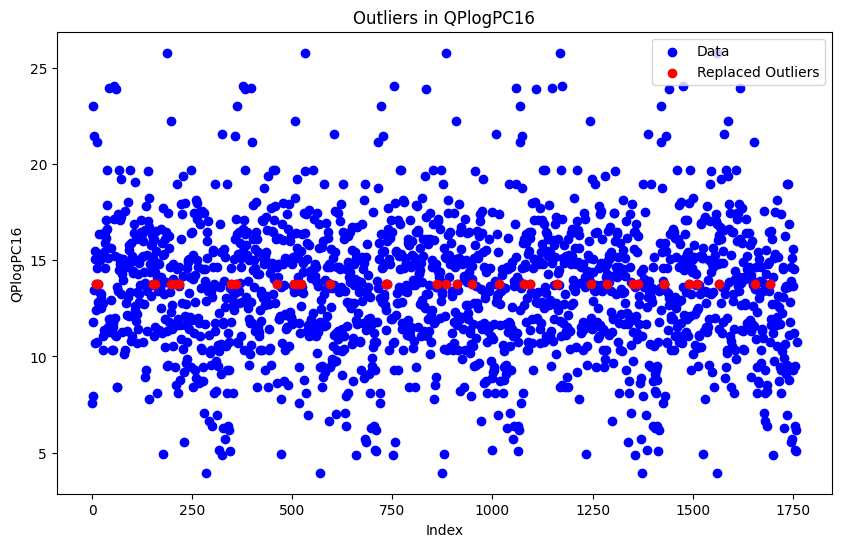

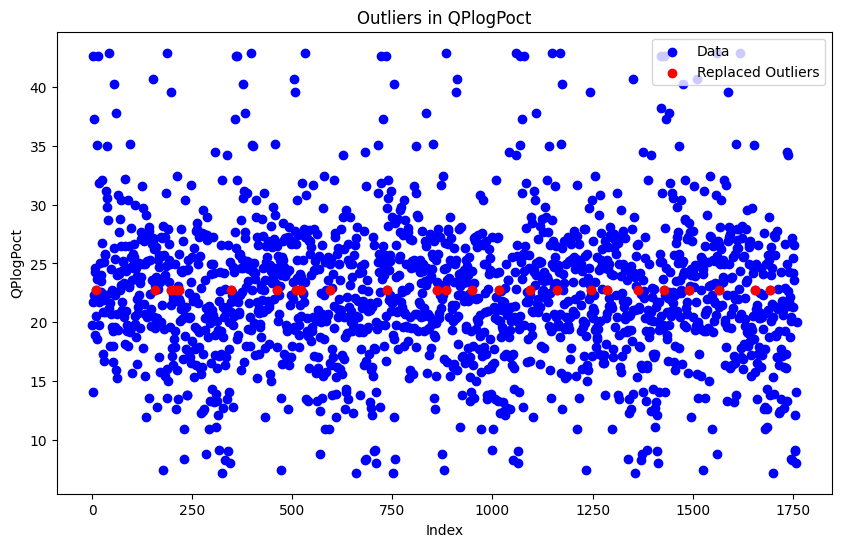

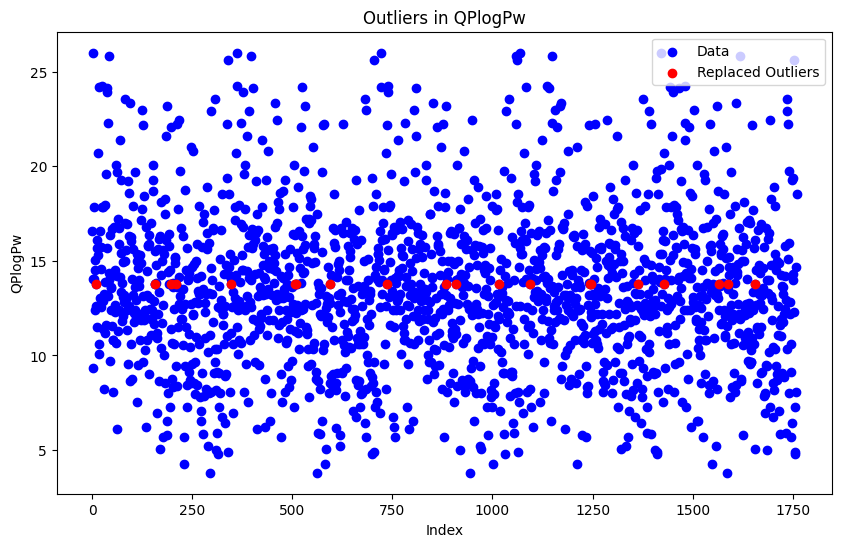

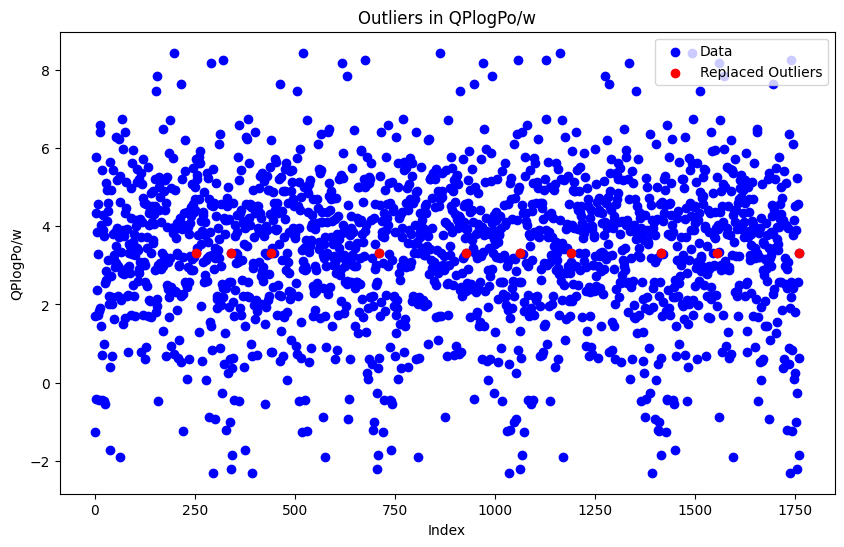

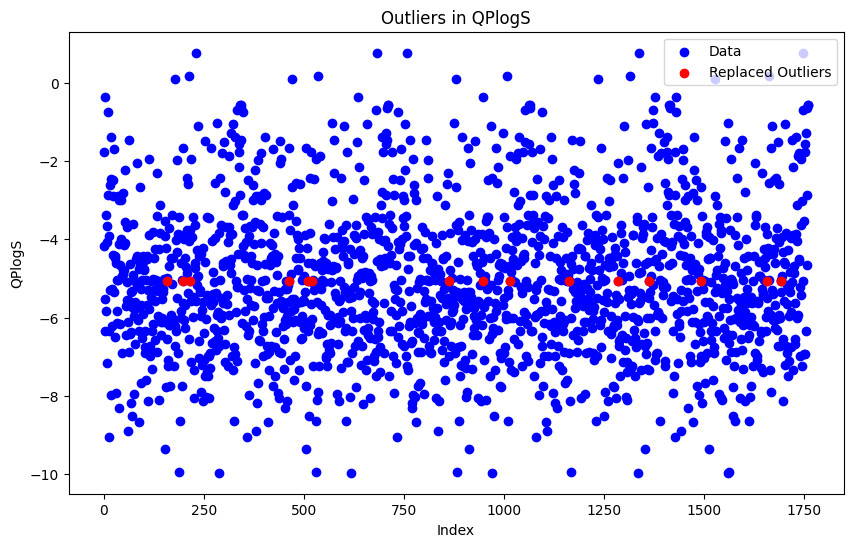

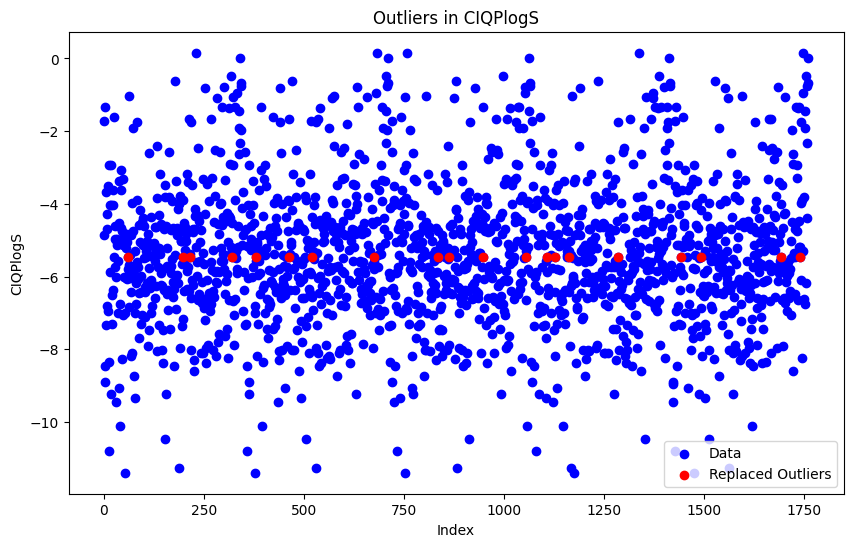

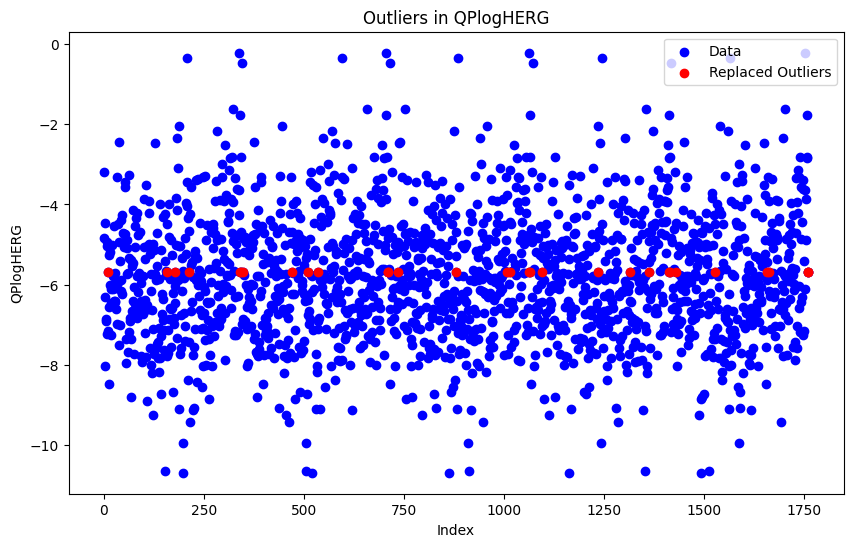

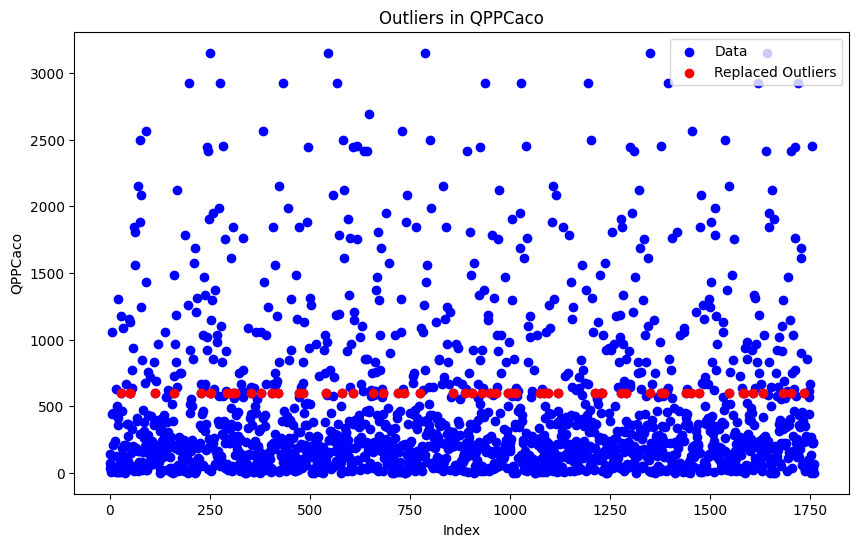

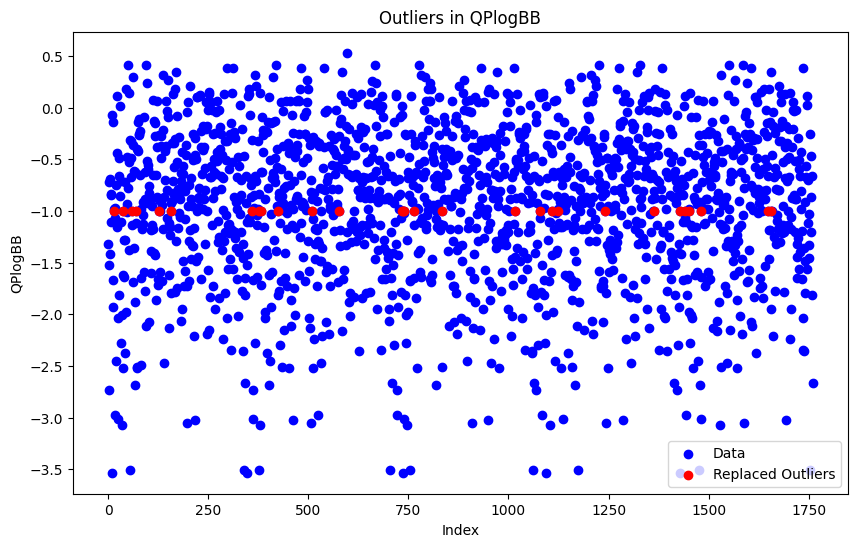

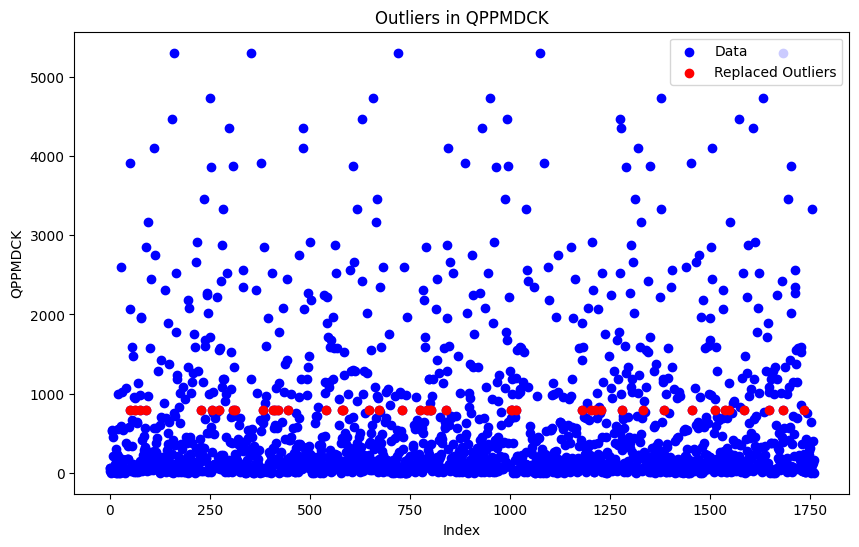

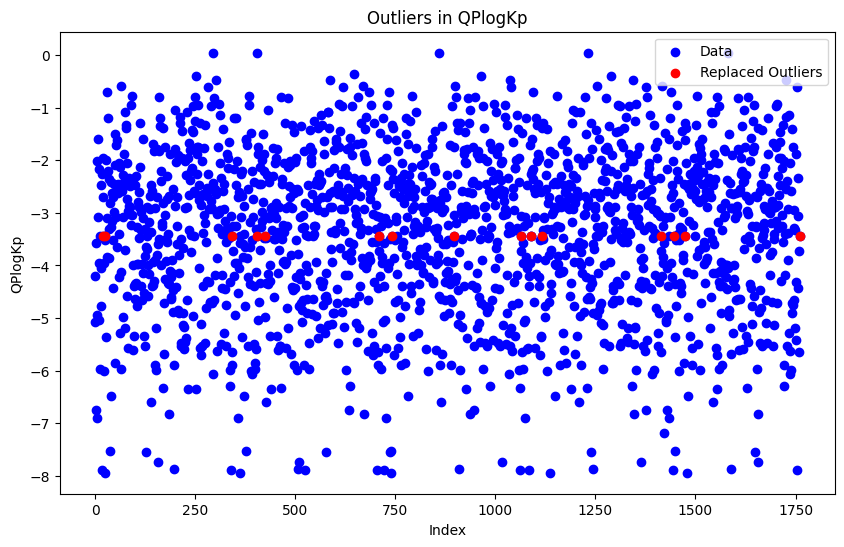

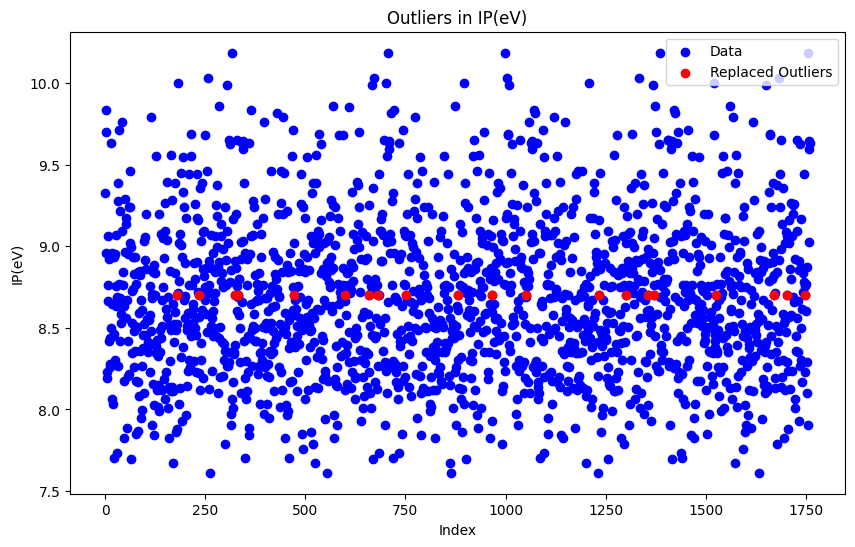

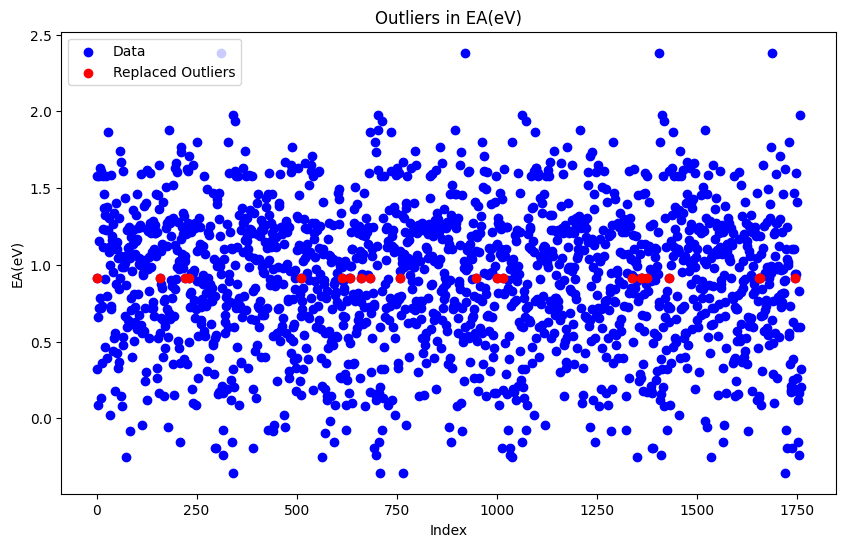

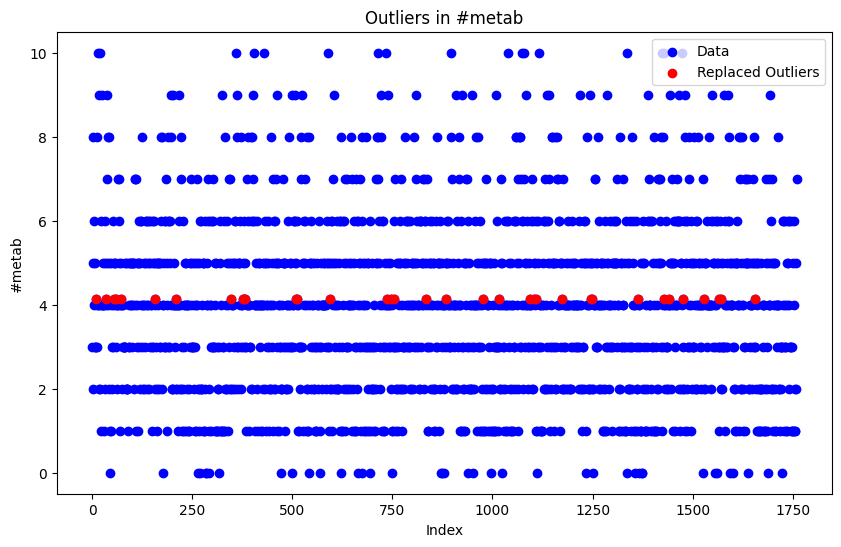

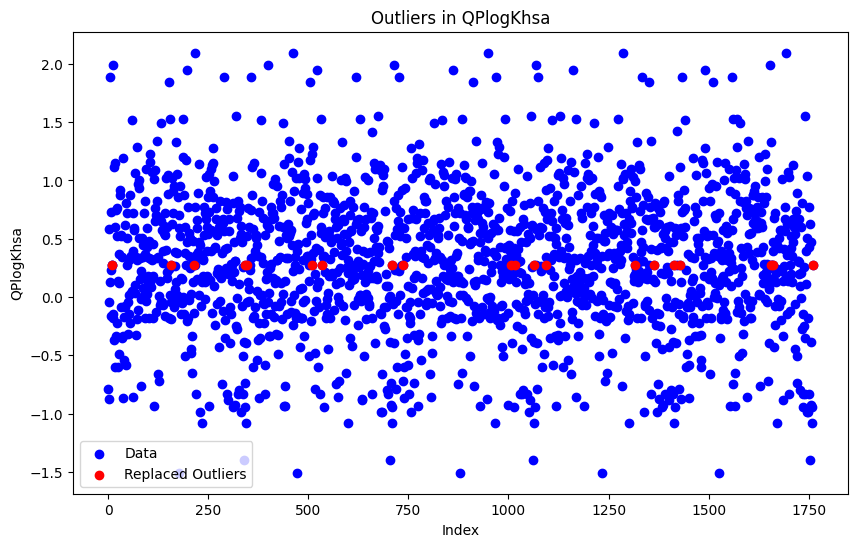

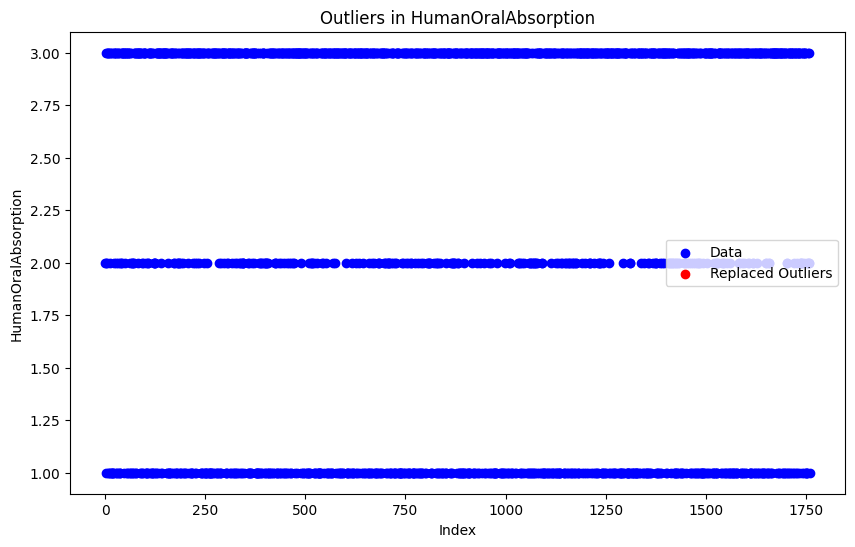

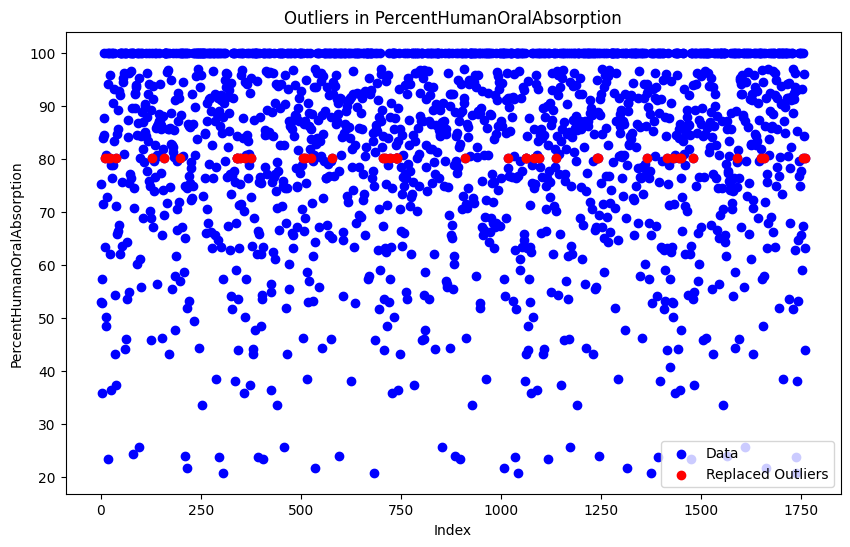

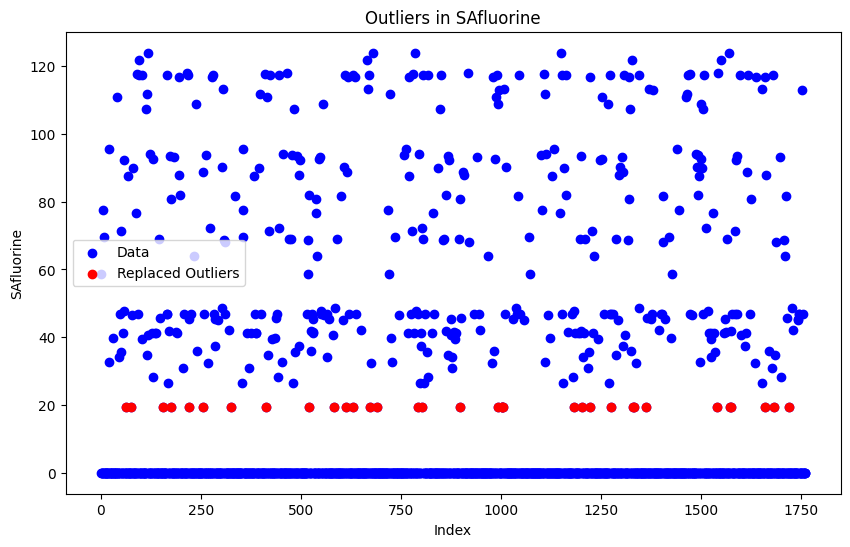

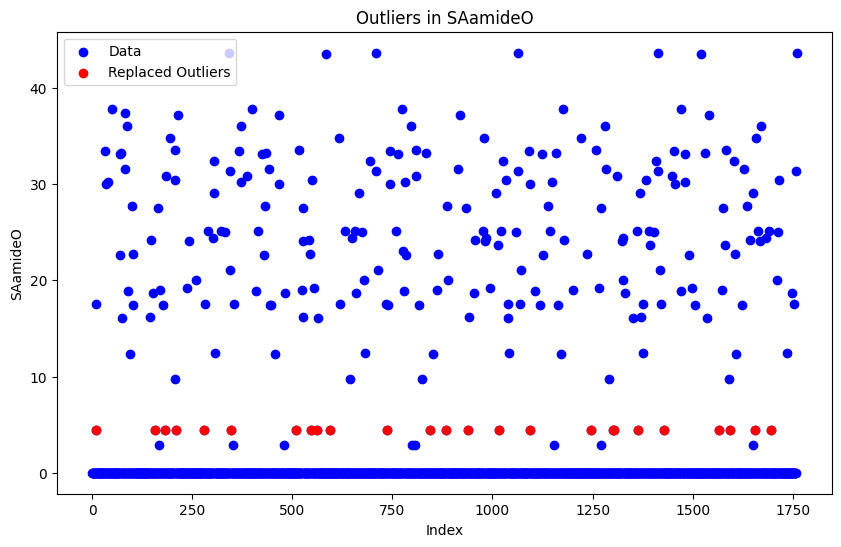

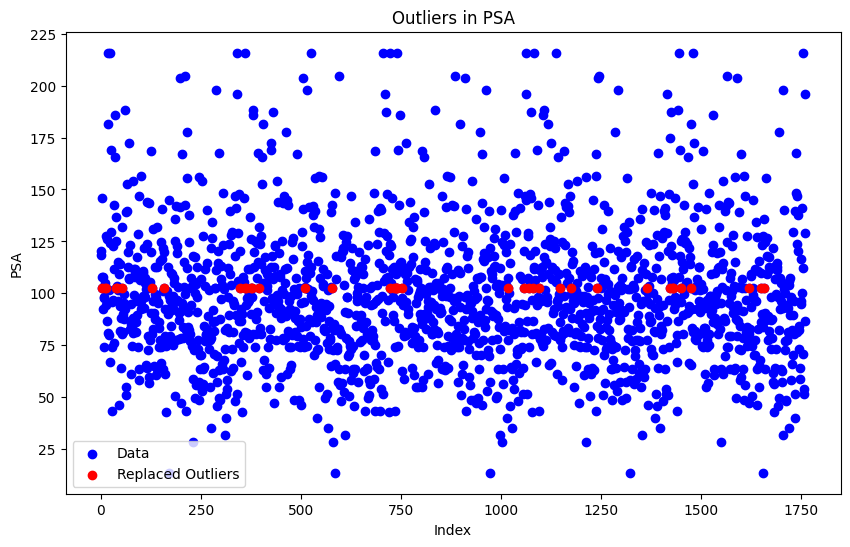

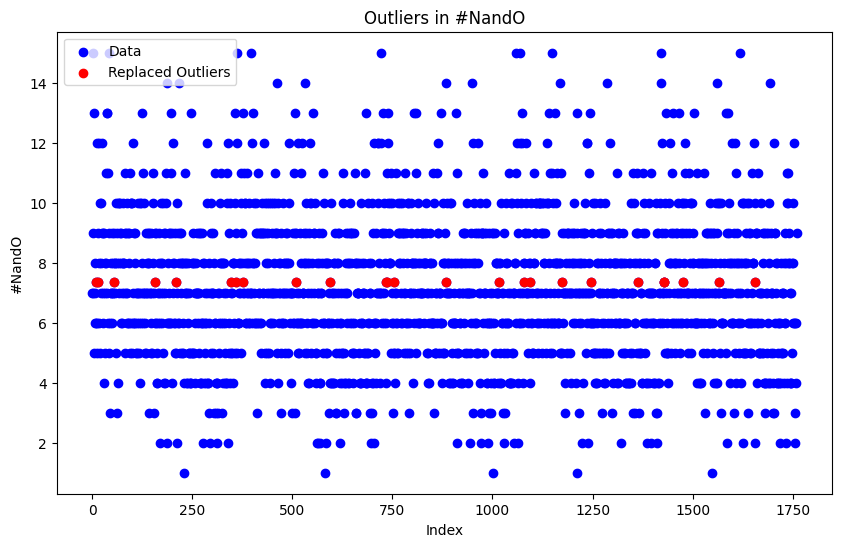

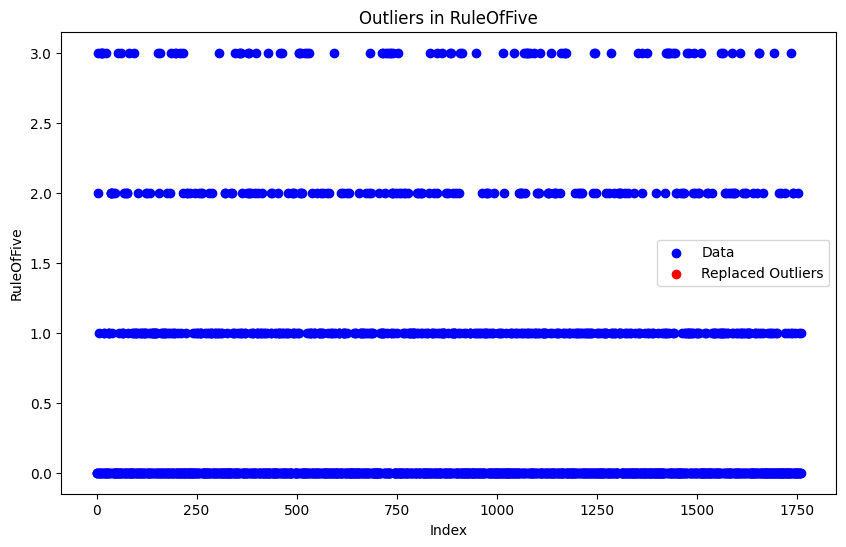

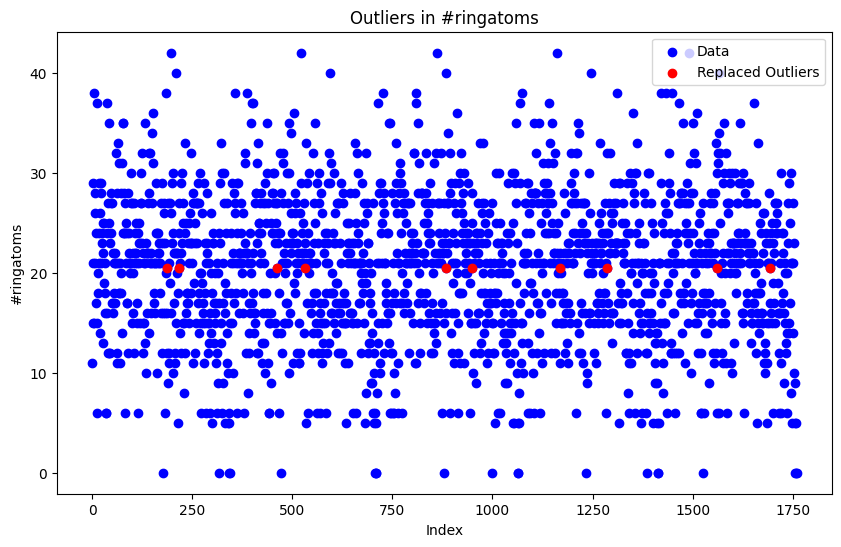

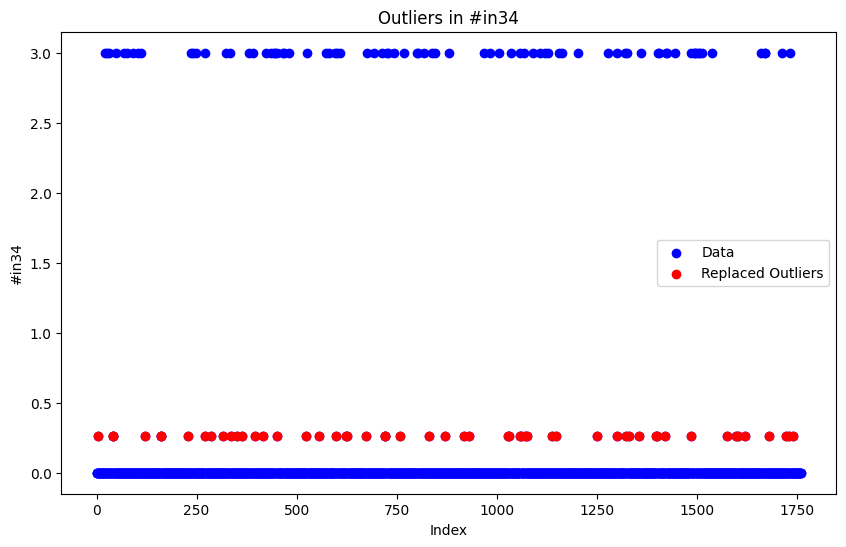

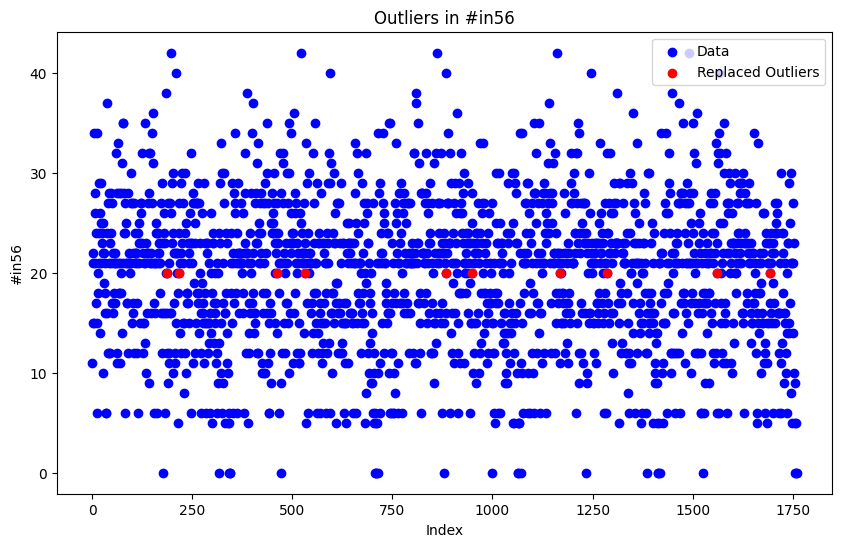

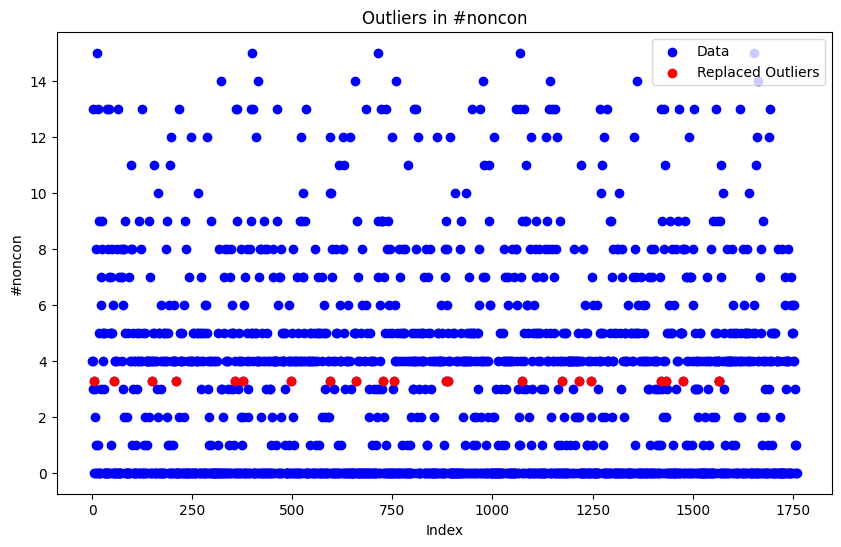

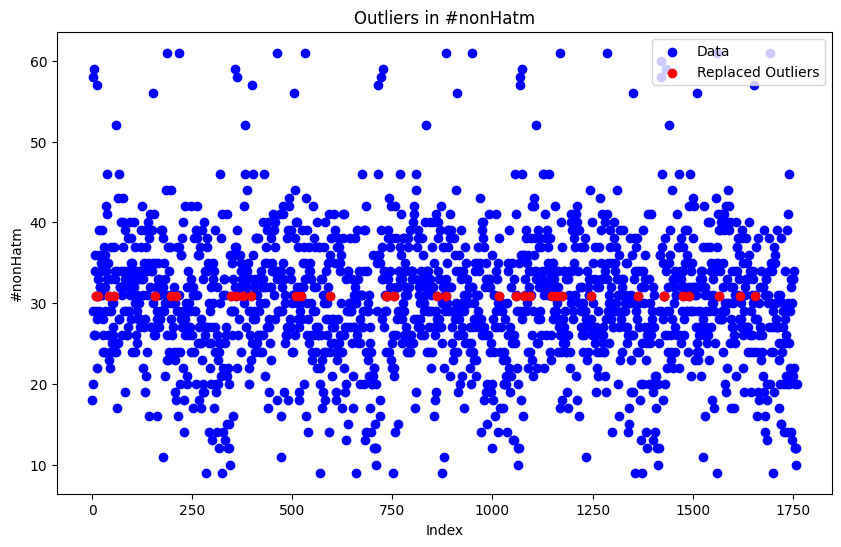

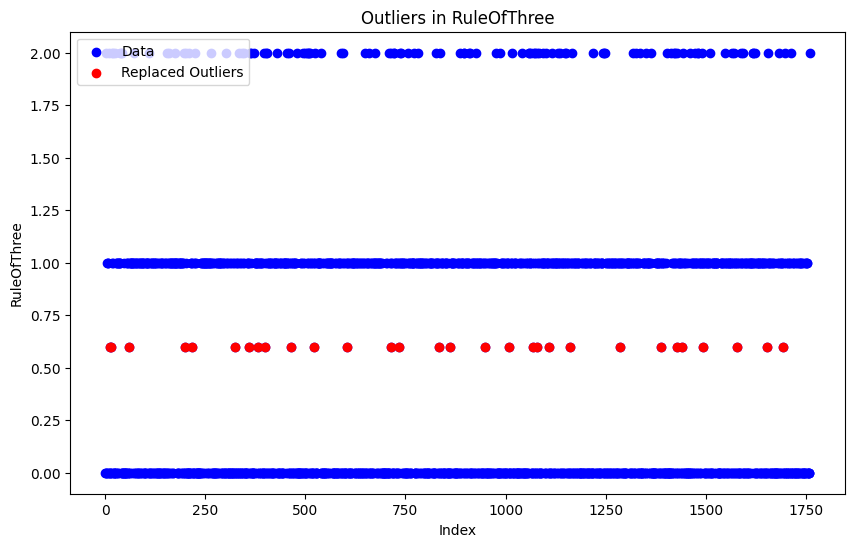

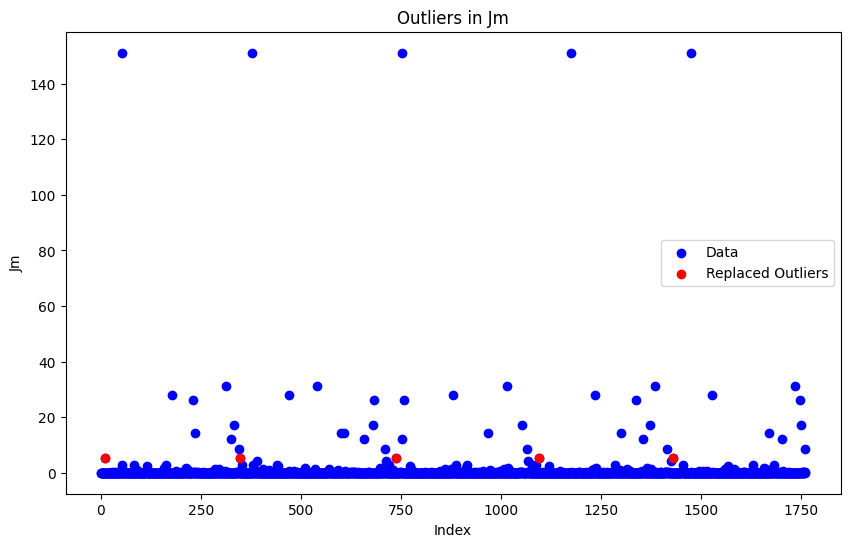

Number of outliers replaced in #stars: 50
Number of outliers replaced in #amine: 15
Number of outliers replaced in #amidine: 17
Number of outliers replaced in #acid: 28
Number of outliers replaced in #amide: 15
Number of outliers replaced in #rotor: 30
Number of outliers replaced in #rtvFG: 29
Number of outliers replaced in CNS: 0
Number of outliers replaced in mol_MW: 35
Number of outliers replaced in dipole: 5
Number of outliers replaced in SASA: 30
Number of outliers replaced in FOSA: 24
Number of outliers replaced in FISA: 18
Number of outliers replaced in PISA: 0
Number of outliers replaced in WPSA: 14
Number of outliers replaced in volume: 35
Number of outliers replaced in donorHB: 14
Number of outliers replaced in accptHB: 15
Number of outliers replaced in dip^2/V: 25
Number of outliers replaced in ACxDN^.5/SA: 29
Number of outliers replaced in glob: 5
Number of outliers replaced in QPpolrz: 25
Number of outliers replaced in QPlogPC16: 35
Number of outliers replaced in QPlogPoct

In [9]:
from scipy import stats
import matplotlib.pyplot as plt

columns_to_check = ['#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG',
                    'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA',
                    'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob',
                    'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS',
                    'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp',
                    'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption',
                    'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO',
                    'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm',
                    'RuleOfThree', 'Jm']

threshold = 3

outliers = {}
for column in columns_to_check:
    z_scores = np.abs(stats.zscore(df1[column]))
    outliers[column] = np.where(z_scores > threshold)[0]

for column, indices in outliers.items():
    column_mean = df1[column].mean()
    df1.loc[indices, column] = column_mean

for column, indices in outliers.items():
    plt.figure(figsize=(10, 6))
    plt.scatter(df1.index, df1[column], c='blue', label='Data')
    plt.scatter(indices, df1.iloc[indices][column], c='red', label='Replaced Outliers')
    plt.title(f'Outliers in {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.legend()
    plt.show()

df1.to_csv('cleaned_data.csv', index=False)

for column, indices in outliers.items():
    print(f"Number of outliers replaced in {column}: {len(indices)}")


In [10]:
data = pd.read_csv('/content/cleaned_data.csv')

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

columns = ['#stars', '#amine', '#amidine', '#acid', '#amide', '#rotor', '#rtvFG',
                    'CNS', 'mol_MW', 'dipole', 'SASA', 'FOSA', 'FISA', 'PISA', 'WPSA',
                    'volume', 'donorHB', 'accptHB', 'dip^2/V', 'ACxDN^.5/SA', 'glob',
                    'QPpolrz', 'QPlogPC16', 'QPlogPoct', 'QPlogPw', 'QPlogPo/w', 'QPlogS',
                    'CIQPlogS', 'QPlogHERG', 'QPPCaco', 'QPlogBB', 'QPPMDCK', 'QPlogKp',
                    'IP(eV)', 'EA(eV)', '#metab', 'QPlogKhsa', 'HumanOralAbsorption',
                    'PercentHumanOralAbsorption', 'SAfluorine', 'SAamideO', 'PSA', '#NandO',
                    'RuleOfFive', '#ringatoms', '#in34', '#in56', '#noncon', '#nonHatm',
                    'RuleOfThree', 'Jm', 'Labels']

df = df1[columns]
X = df.drop('Labels', axis=1)
y = df['Labels']

In [12]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
X= X_resampled
y= y_resampled

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **RandomForestClassifier**

In [14]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import optuna

param_distributions = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Hyperparameters from RandomizedSearchCV:", random_search.best_params_)

def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 20)

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)

    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best Hyperparameters from Optuna:", study.best_params)

best_rf_random_search = RandomForestClassifier(**random_search.best_params_, random_state=42)
best_rf_random_search.fit(X_train, y_train)
accuracy_random_search = best_rf_random_search.score(X_test, y_test)
print("Test Accuracy with RandomizedSearchCV Tuning:", accuracy_random_search)

best_rf_optuna = RandomForestClassifier(**study.best_params, random_state=42)
best_rf_optuna.fit(X_train, y_train)
accuracy_optuna = best_rf_optuna.score(X_test, y_test)
print("Test Accuracy with Optuna Tuning:", accuracy_optuna)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[I 2024-08-07 17:10:32,828] A new study created in memory with name: no-name-e12d46b7-b186-4928-b30b-14da77af8662


Best Hyperparameters from RandomizedSearchCV: {'n_estimators': 200, 'max_depth': 20}


[I 2024-08-07 17:10:38,084] Trial 0 finished with value: 0.8018691588785046 and parameters: {'n_estimators': 143, 'max_depth': 11}. Best is trial 0 with value: 0.8018691588785046.
[I 2024-08-07 17:10:40,385] Trial 1 finished with value: 0.8037383177570093 and parameters: {'n_estimators': 121, 'max_depth': 10}. Best is trial 1 with value: 0.8037383177570093.
[I 2024-08-07 17:10:41,861] Trial 2 finished with value: 0.7389408099688474 and parameters: {'n_estimators': 107, 'max_depth': 5}. Best is trial 1 with value: 0.8037383177570093.
[I 2024-08-07 17:10:43,729] Trial 3 finished with value: 0.788785046728972 and parameters: {'n_estimators': 170, 'max_depth': 7}. Best is trial 1 with value: 0.8037383177570093.
[I 2024-08-07 17:10:45,150] Trial 4 finished with value: 0.7401869158878505 and parameters: {'n_estimators': 158, 'max_depth': 5}. Best is trial 1 with value: 0.8037383177570093.
[I 2024-08-07 17:10:47,693] Trial 5 finished with value: 0.8012461059190031 and parameters: {'n_estimato

Best Hyperparameters from Optuna: {'n_estimators': 89, 'max_depth': 10}
Test Accuracy with RandomizedSearchCV Tuning: 0.8261682242990654
Test Accuracy with Optuna Tuning: 0.8261682242990654


Accuracy: 0.8261682242990654
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       270
           1       0.82      0.83      0.82       265

    accuracy                           0.83       535
   macro avg       0.83      0.83      0.83       535
weighted avg       0.83      0.83      0.83       535



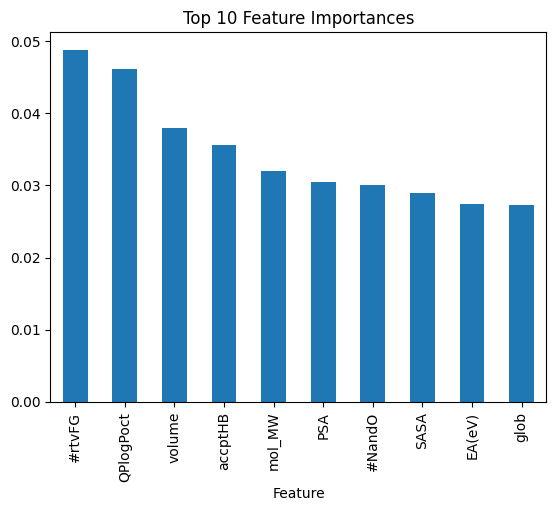

In [15]:
y_pred = best_rf_optuna.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

importances = best_rf_optuna.feature_importances_
feature_names = X.columns

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False).head(10)

importances_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Feature Importances")
plt.show()

In [16]:
top_features = importances_df['Feature'].tolist()

if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=feature_names)
    X_test = pd.DataFrame(X_test, columns=feature_names)

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

best_rf_top_features = RandomForestClassifier(**study.best_params, random_state=42)
best_rf_top_features.fit(X_train_top, y_train)

y_pred_top = best_rf_top_features.predict(X_test_top)

print(f"Accuracy with top 10 features: {accuracy_score(y_test, y_pred_top)}")
print(classification_report(y_test, y_pred_top))

pickle_filename = 'random_forest_top_features_model.pkl'
with open(pickle_filename, 'wb') as file:
    pickle.dump(best_rf_top_features, file)

print(f'Model saved as {pickle_filename}')

Accuracy with top 10 features: 0.8093457943925234
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       270
           1       0.80      0.83      0.81       265

    accuracy                           0.81       535
   macro avg       0.81      0.81      0.81       535
weighted avg       0.81      0.81      0.81       535

Model saved as random_forest_top_features_model.pkl


In [17]:
with open(pickle_filename, 'rb') as model_file:
    loaded_rf_model = pickle.load(model_file)

def make_prediction(model, prompt):
    prediction = model.predict(prompt)
    return prediction
while True:
    user_input = input("Enter a comma-separated prompt (or 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    prompts = [float(value) for value in user_input.split(',')]
    result = make_prediction(loaded_rf_model, [prompts])
    print(f"Prediction for '{prompts}': {result}")

Enter a comma-separated prompt (or 'exit' to quit): exit


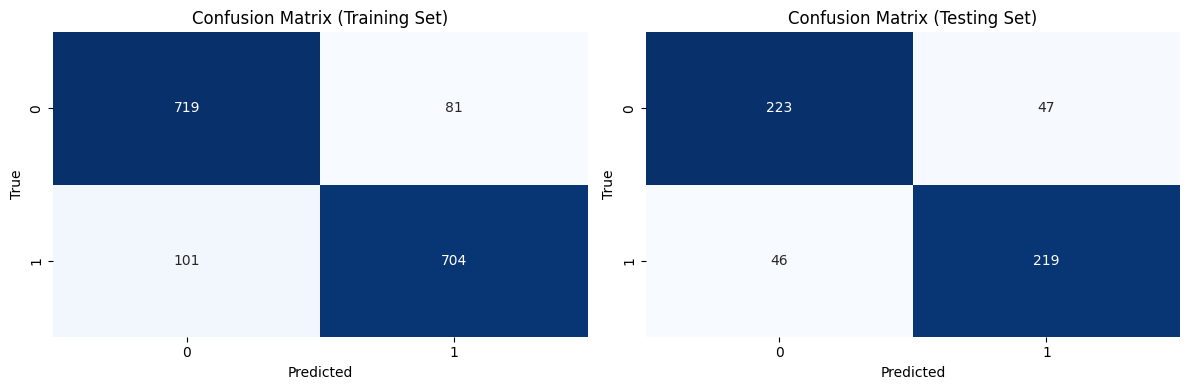

In [18]:
y_train_pred = best_rf_optuna.predict(X_train)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Testing set
y_test_pred = best_rf_optuna.predict(X_test)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix (Training Set)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Testing set
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix (Testing Set)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

Test Accuracy: 82.62%
Train Accuracy: 88.66%
Test Precision: 82.33%
Train Precision: 89.68%
Test Recall: 82.64%
Train Recall: 87.45%
Test_specificity: 82.59%
Train_specificity: 89.88%
f1_score: 82.49%
f1_score: 88.55%
AUC value: 0.90


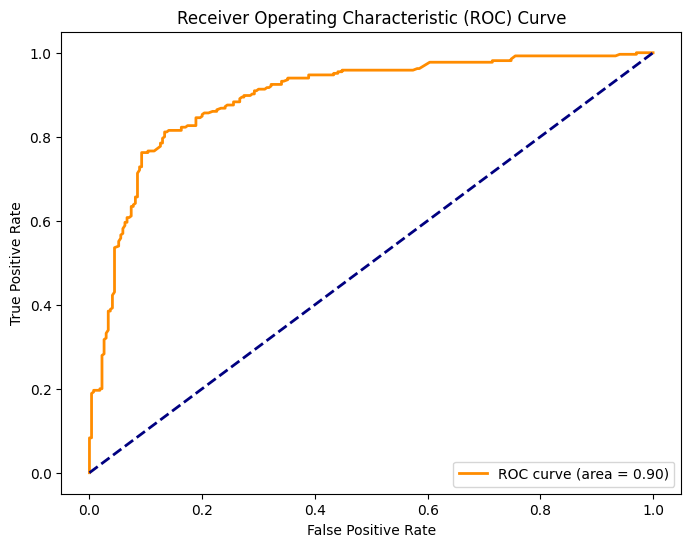

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

accuracy = (conf_matrix_test[0, 0] + conf_matrix_test[1, 1]) / np.sum(conf_matrix_test)
print(f"Test Accuracy: {accuracy:.2%}")

accuracy = (conf_matrix_train[0, 0] + conf_matrix_train[1, 1]) / np.sum(conf_matrix_train)
print(f"Train Accuracy: {accuracy:.2%}")

Test_precision = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[0, 1])
print(f"Test Precision: {Test_precision:.2%}")

Train_precision = conf_matrix_train[1, 1] / (conf_matrix_train[1, 1] + conf_matrix_train[0, 1])
print(f"Train Precision: {Train_precision:.2%}")

Test_recall = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[1, 0])
print(f"Test Recall: {Test_recall:.2%}")

Train_recall = conf_matrix_train[1, 1] / (conf_matrix_train[1, 1] + conf_matrix_train[1, 0])
print(f"Train Recall: {Train_recall:.2%}")

Test_specificity = conf_matrix_test[0, 0] / (conf_matrix_test[0, 0] + conf_matrix_test[0, 1])
print(f"Test_specificity: {Test_specificity:.2%}")

Train_specificity = conf_matrix_train[0, 0] / (conf_matrix_train[0, 0] + conf_matrix_train[0, 1])
print(f"Train_specificity: {Train_specificity:.2%}")

f1_score_Test = 2 * (Test_precision * Test_recall) / (Test_precision + Test_recall)
print(f"f1_score: {f1_score_Test:.2%}")

f1_score_Train = 2 * (Train_precision * Train_recall) / (Train_precision + Train_recall)
print(f"f1_score: {f1_score_Train:.2%}")

auc_value = roc_auc_score(y_test, best_rf_optuna.predict_proba(X_test)[:, 1])
print(f"AUC value: {auc_value:.2f}")

fpr, tpr, _ = roc_curve(y_test, best_rf_optuna.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

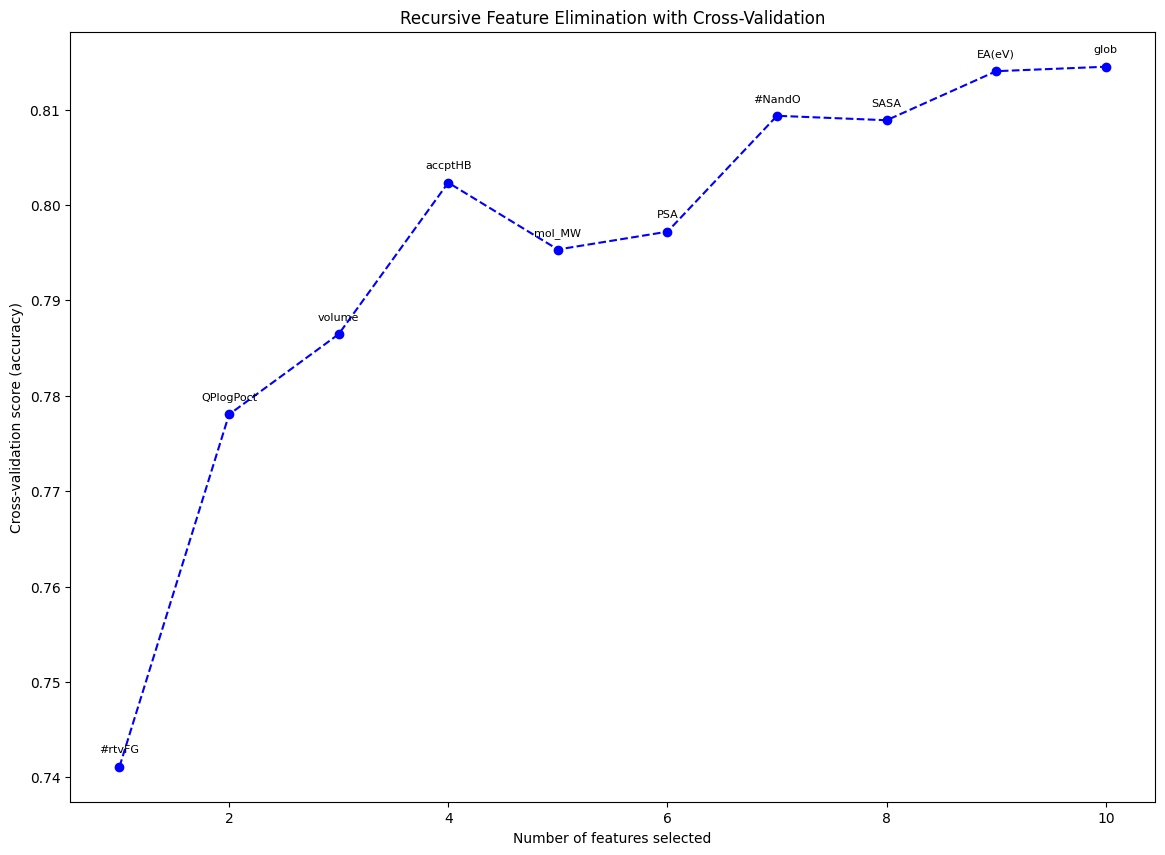

Selected Features: ['#rtvFG' 'QPlogPoct' 'volume' 'accptHB' 'mol_MW' 'PSA' '#NandO' 'SASA'
 'EA(eV)' 'glob']


In [20]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

top_features = importances_df['Feature'].values
X_top_features = X[top_features]

rfecv = RFECV(estimator=best_rf_optuna, step=1, cv=StratifiedKFold(3), scoring='accuracy')
rfecv.fit(X_top_features, y)

plt.figure(figsize=(14, 10))
plt.title('Recursive Feature Elimination with Cross-Validation')
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validation score (accuracy)')

plt.plot(range(1, len(rfecv.support_) + 1), rfecv.cv_results_['mean_test_score'], marker='o', linestyle='--', color='b')

for i, is_feature in enumerate(rfecv.support_):
    if is_feature:
        plt.annotate(f'{X_top_features.columns[i]}',
                     (i + 1, rfecv.cv_results_['mean_test_score'][i]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center',
                     fontsize=8)

plt.show()

selected_features = np.array(X_top_features.columns)[rfecv.support_]
print("Selected Features:", selected_features)

In [21]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf_optuna, X, y, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))

cv_scores = cross_val_score(best_rf_optuna, X, y, cv=10)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))


Cross-validation scores:  [0.79672897 0.75233645 0.84813084 0.84345794 0.84813084]
Mean cross-validation score:  0.8177570093457944
Cross-validation scores:  [0.81308411 0.78037383 0.71962617 0.75700935 0.81775701 0.87850467
 0.76635514 0.92990654 0.80841121 0.91121495]
Mean cross-validation score:  0.8182242990654206


# **Linear Regression**

In [22]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
import optuna

param_distributions = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

random_search = RandomizedSearchCV(
    estimator=LogisticRegression(random_state=42),
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Hyperparameters from RandomizedSearchCV:", random_search.best_params_)

def objective(trial):
    C = trial.suggest_loguniform('C', 1e-4, 1e4)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])

    model = LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=42)

    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best Hyperparameters from Optuna:", study.best_params)

best_lr_random_search = LogisticRegression(**random_search.best_params_, random_state=42)
best_lr_random_search.fit(X_train, y_train)
accuracy_random_search = best_lr_random_search.score(X_test, y_test)
print("Test Accuracy with RandomizedSearchCV Tuning:", accuracy_random_search)

best_lr_optuna = LogisticRegression(**study.best_params, random_state=42)
best_lr_optuna.fit(X_train, y_train)
accuracy_optuna = best_lr_optuna.score(X_test, y_test)
print("Test Accuracy with Optuna Tuning:", accuracy_optuna)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[I 2024-08-07 17:13:57,103] A new study created in memory with name: no-name-61539147-564c-41c6-8aaf-1c67bb62b216


Best Hyperparameters from RandomizedSearchCV: {'solver': 'saga', 'penalty': 'l1', 'C': 1}


[I 2024-08-07 17:13:57,763] Trial 0 finished with value: 0.6641744548286604 and parameters: {'C': 1.5005143538137533, 'penalty': 'l1', 'solver': 'saga'}. Best is trial 0 with value: 0.6641744548286604.
[I 2024-08-07 17:13:57,923] Trial 1 finished with value: 0.6448598130841122 and parameters: {'C': 0.010382657305415037, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 0 with value: 0.6641744548286604.
[I 2024-08-07 17:13:58,238] Trial 2 finished with value: 0.6056074766355141 and parameters: {'C': 0.020078207434066304, 'penalty': 'l1', 'solver': 'saga'}. Best is trial 0 with value: 0.6641744548286604.
[I 2024-08-07 17:13:58,727] Trial 3 finished with value: 0.6623052959501557 and parameters: {'C': 0.342572125388247, 'penalty': 'l2', 'solver': 'saga'}. Best is trial 0 with value: 0.6641744548286604.
[I 2024-08-07 17:13:58,809] Trial 4 finished with value: 0.6573208722741434 and parameters: {'C': 0.22485241883091747, 'penalty': 'l1', 'solver': 'liblinear'}. Best is trial 0 with value: 0

Best Hyperparameters from Optuna: {'C': 1.2467190801794308, 'penalty': 'l1', 'solver': 'saga'}
Test Accuracy with RandomizedSearchCV Tuning: 0.6542056074766355
Test Accuracy with Optuna Tuning: 0.6560747663551402


Accuracy: 0.6542056074766355
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       270
           1       0.64      0.67      0.66       265

    accuracy                           0.65       535
   macro avg       0.65      0.65      0.65       535
weighted avg       0.65      0.65      0.65       535



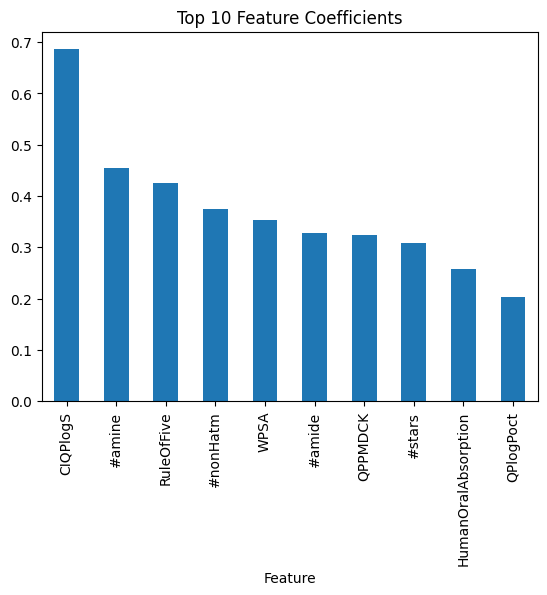

In [23]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_lr_random_search.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

coefficients = best_lr_optuna.coef_[0]
feature_names = X.columns

coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coefficients_df = coefficients_df.sort_values(by='Coefficient', ascending=False).head(10)

coefficients_df.plot(kind='bar', x='Feature', y='Coefficient', legend=False)
plt.title("Top 10 Feature Coefficients")
plt.show()


In [24]:
from sklearn.metrics import accuracy_score, classification_report

top_features = importances_df['Feature'].tolist()

if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=feature_names)
    X_test = pd.DataFrame(X_test, columns=feature_names)

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

best_lr_top_features = LogisticRegression(**random_search.best_params_, random_state=42)
best_lr_top_features.fit(X_train_top, y_train)

y_pred_top = best_lr_top_features.predict(X_test_top)

print(f"Accuracy with top 10 features: {accuracy_score(y_test, y_pred_top)}")
print(classification_report(y_test, y_pred_top))

pickle_filename = 'logistic_regression_top_features_model.pkl'
with open(pickle_filename, 'wb') as file:
    pickle.dump(best_lr_top_features, file)

print(f'Model saved as {pickle_filename}')


Accuracy with top 10 features: 0.5925233644859813
              precision    recall  f1-score   support

           0       0.60      0.57      0.58       270
           1       0.58      0.62      0.60       265

    accuracy                           0.59       535
   macro avg       0.59      0.59      0.59       535
weighted avg       0.59      0.59      0.59       535

Model saved as logistic_regression_top_features_model.pkl


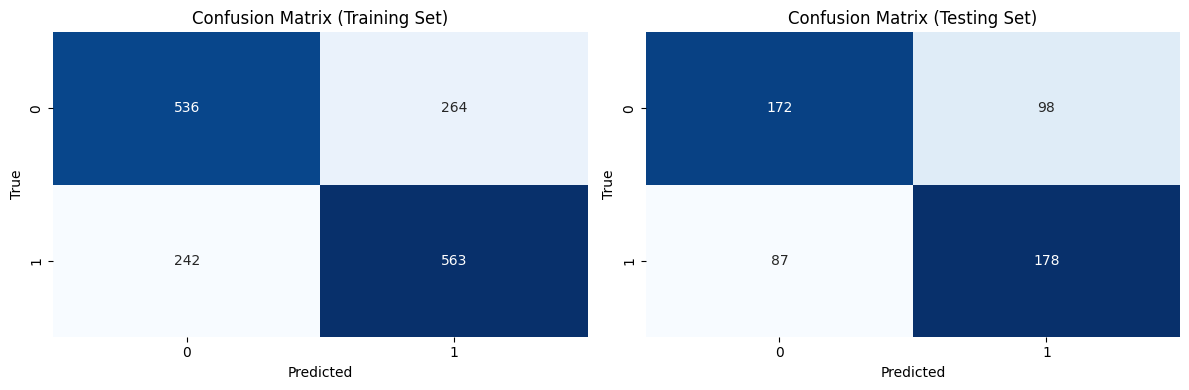

In [25]:
from sklearn.metrics import confusion_matrix

# Predictions and confusion matrix for training set
y_train_pred = best_lr_random_search.predict(X_train)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Predictions and confusion matrix for testing set
y_test_pred = best_lr_random_search.predict(X_test)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrices
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix (Training Set)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix (Testing Set)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()


Test Accuracy: 65.42%
Train Accuracy: 68.47%
Test Precision: 64.49%
Train Precision: 68.08%
Test Recall: 67.17%
Train Recall: 69.94%
Test Specificity: 63.70%
Train Specificity: 67.00%
Test F1 Score: 65.80%
Train F1 Score: 69.00%
AUC value: 0.70


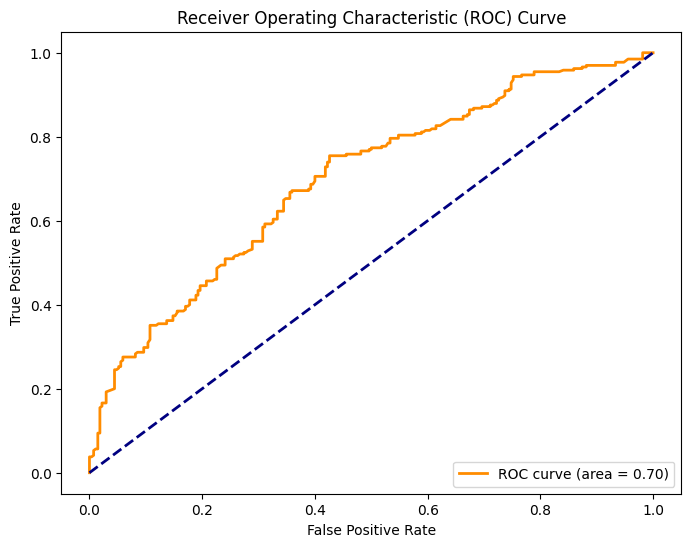

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy_test:.2%}")

accuracy_train = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {accuracy_train:.2%}")

precision_test = precision_score(y_test, y_test_pred)
print(f"Test Precision: {precision_test:.2%}")

precision_train = precision_score(y_train, y_train_pred)
print(f"Train Precision: {precision_train:.2%}")

recall_test = recall_score(y_test, y_test_pred)
print(f"Test Recall: {recall_test:.2%}")

recall_train = recall_score(y_train, y_train_pred)
print(f"Train Recall: {recall_train:.2%}")

specificity_test = (conf_matrix_test[0, 0] / (conf_matrix_test[0, 0] + conf_matrix_test[0, 1]))
print(f"Test Specificity: {specificity_test:.2%}")

specificity_train = (conf_matrix_train[0, 0] / (conf_matrix_train[0, 0] + conf_matrix_train[0, 1]))
print(f"Train Specificity: {specificity_train:.2%}")

f1_score_test = f1_score(y_test, y_test_pred)
print(f"Test F1 Score: {f1_score_test:.2%}")

f1_score_train = f1_score(y_train, y_train_pred)
print(f"Train F1 Score: {f1_score_train:.2%}")

auc_value = roc_auc_score(y_test, best_lr_random_search.predict_proba(X_test)[:, 1])
print(f"AUC value: {auc_value:.2f}")

fpr, tpr, _ = roc_curve(y_test, best_lr_random_search.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


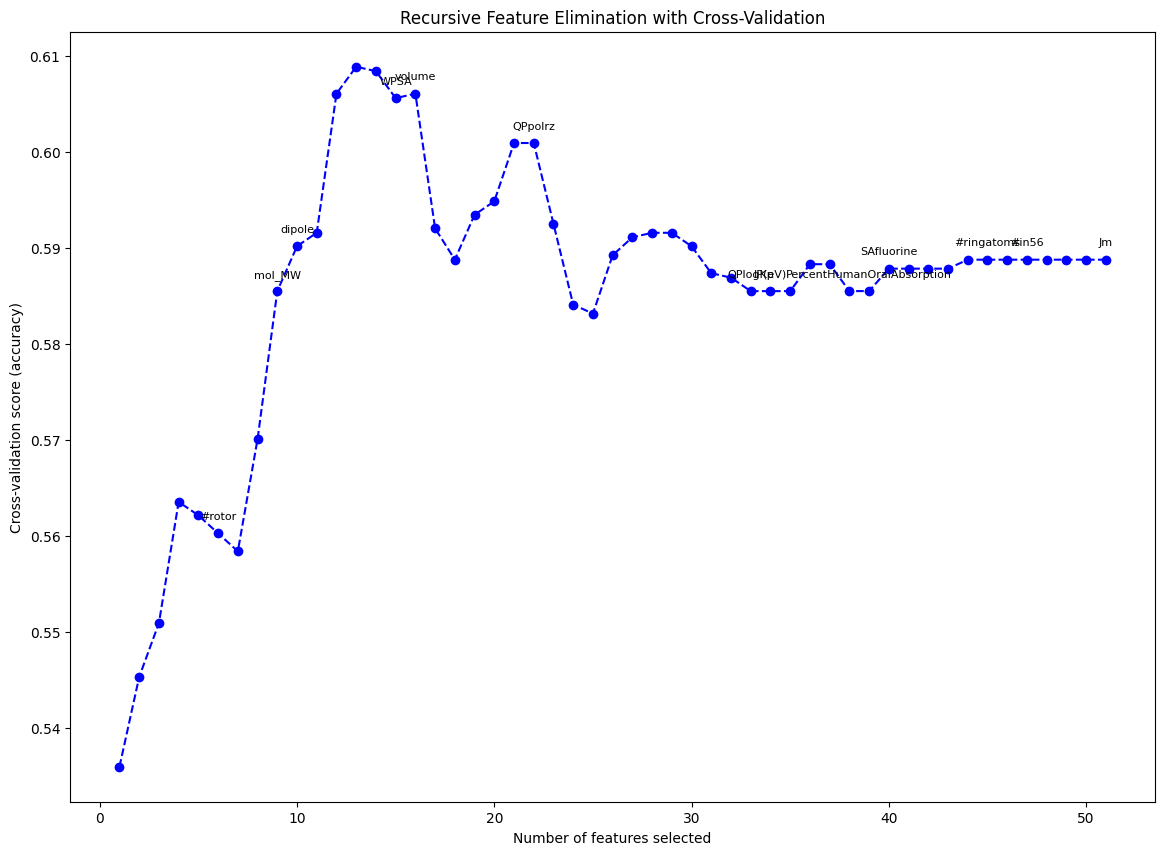

Selected Features: ['#rotor' 'mol_MW' 'dipole' 'WPSA' 'volume' 'QPpolrz' 'QPlogKp' 'IP(eV)'
 'PercentHumanOralAbsorption' 'SAfluorine' '#ringatoms' '#in56' 'Jm']


In [27]:
# Initialize LogisticRegression model
log_reg_model = LogisticRegression(**random_search.best_params_, random_state=42)

# Fit RFECV
rfecv = RFECV(estimator=log_reg_model, step=1, cv=StratifiedKFold(3), scoring='accuracy')
rfecv.fit(X, y)

# Plot RFECV results
plt.figure(figsize=(14, 10))
plt.title('Recursive Feature Elimination with Cross-Validation')
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validation score (accuracy)')

plt.plot(range(1, len(rfecv.support_) + 1), rfecv.cv_results_['mean_test_score'], marker='o', linestyle='--', color='b')

for i, is_feature in enumerate(rfecv.support_):
    if is_feature:
        plt.annotate(f'{X.columns[i]}',
                     (i + 1, rfecv.cv_results_['mean_test_score'][i]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center',
                     fontsize=8)

plt.show()

# Get selected features
selected_features = np.array(X.columns)[rfecv.support_]
print("Selected Features:", selected_features)


In [28]:
log_reg_model = LogisticRegression(**random_search.best_params_, random_state=42)

cv_scores_5 = cross_val_score(log_reg_model, X, y, cv=5)
print("5-Fold Cross-validation scores: ", cv_scores_5)
print("Mean 5-Fold Cross-validation score: ", np.mean(cv_scores_5))

cv_scores_10 = cross_val_score(log_reg_model, X, y, cv=10)
print("10-Fold Cross-validation scores: ", cv_scores_10)
print("Mean 10-Fold Cross-validation score: ", np.mean(cv_scores_10))


5-Fold Cross-validation scores:  [0.60747664 0.5911215  0.61915888 0.54906542 0.56308411]
Mean 5-Fold Cross-validation score:  0.585981308411215
10-Fold Cross-validation scores:  [0.62616822 0.59813084 0.56542056 0.61214953 0.64485981 0.62149533
 0.51401869 0.60747664 0.50934579 0.61682243]
Mean 10-Fold Cross-validation score:  0.591588785046729


# **GaussianNB**

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

param_distributions = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

random_search = RandomizedSearchCV(
    estimator=GaussianNB(),
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Hyperparameters from RandomizedSearchCV:", random_search.best_params_)

best_nb_random_search = GaussianNB(**random_search.best_params_)
best_nb_random_search.fit(X_train, y_train)
accuracy_random_search = best_nb_random_search.score(X_test, y_test)
print("Test Accuracy with RandomizedSearchCV Tuning:", accuracy_random_search)

def objective(trial):
    var_smoothing = trial.suggest_loguniform('var_smoothing', 1e-9, 1e-0)

    model = GaussianNB(var_smoothing=var_smoothing)

    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best Hyperparameters from Optuna:", study.best_params)

best_nb_optuna = GaussianNB(**study.best_params)
best_nb_optuna.fit(X_train, y_train)
accuracy_optuna = best_nb_optuna.score(X_test, y_test)
print("Test Accuracy with Optuna Tuning:", accuracy_optuna)


[I 2024-08-07 17:15:41,927] A new study created in memory with name: no-name-023126a3-dca6-4a55-b2bf-9188203c820c


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Hyperparameters from RandomizedSearchCV: {'var_smoothing': 1.0}
Test Accuracy with RandomizedSearchCV Tuning: 0.5514018691588785


[I 2024-08-07 17:15:41,958] Trial 0 finished with value: 0.5894080996884735 and parameters: {'var_smoothing': 0.008415876497588997}. Best is trial 0 with value: 0.5894080996884735.
[I 2024-08-07 17:15:41,980] Trial 1 finished with value: 0.6024922118380062 and parameters: {'var_smoothing': 0.9621849728127805}. Best is trial 1 with value: 0.6024922118380062.
[I 2024-08-07 17:15:42,002] Trial 2 finished with value: 0.5906542056074766 and parameters: {'var_smoothing': 3.0886280913362944e-06}. Best is trial 1 with value: 0.6024922118380062.
[I 2024-08-07 17:15:42,023] Trial 3 finished with value: 0.5894080996884735 and parameters: {'var_smoothing': 0.00035140433054612935}. Best is trial 1 with value: 0.6024922118380062.
[I 2024-08-07 17:15:42,044] Trial 4 finished with value: 0.5906542056074766 and parameters: {'var_smoothing': 3.458280514540381e-08}. Best is trial 1 with value: 0.6024922118380062.
[I 2024-08-07 17:15:42,066] Trial 5 finished with value: 0.5906542056074766 and parameters: 

Best Hyperparameters from Optuna: {'var_smoothing': 0.9621849728127805}
Test Accuracy with Optuna Tuning: 0.5514018691588785


In [30]:
from sklearn.inspection import permutation_importance
from sklearn.naive_bayes import GaussianNB

result = permutation_importance(best_nb_optuna, X, y, n_repeats=10, random_state=42, scoring='accuracy')
importances = result.importances_mean
indices = np.argsort(importances)[::-1]

top_features = np.array(X.columns)[indices][:10]
X_top_features = X[top_features]

best_nb_top_features = GaussianNB()
best_nb_top_features.fit(X_top_features, y)

y_pred_top = best_nb_top_features.predict(X_top_features)
print(f"Accuracy with top features: {accuracy_score(y, y_pred_top)}")
print(classification_report(y, y_pred_top))

importances_df = pd.DataFrame({
    'Feature': top_features,
    'Importance': importances[indices][:10]
})


Accuracy with top features: 0.5341121495327102
              precision    recall  f1-score   support

           0       0.59      0.22      0.32      1070
           1       0.52      0.85      0.65      1070

    accuracy                           0.53      2140
   macro avg       0.56      0.53      0.48      2140
weighted avg       0.56      0.53      0.48      2140



<Figure size 1000x600 with 0 Axes>

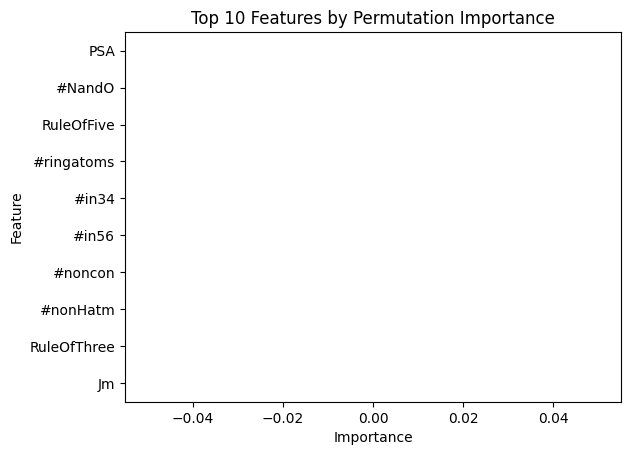

In [31]:
plt.figure(figsize=(10, 6))
importances_df.sort_values(by='Importance', ascending=True).plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Features by Permutation Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [32]:
print(f"Accuracy with top features: {accuracy_score(y, y_pred_top)}")
print(classification_report(y, y_pred_top))

pickle_filename = 'gaussian_nb_top_features_model.pkl'
with open(pickle_filename, 'wb') as file:
    pickle.dump(best_nb_top_features, file)

print(f'Model saved as {pickle_filename}')


Accuracy with top features: 0.5341121495327102
              precision    recall  f1-score   support

           0       0.59      0.22      0.32      1070
           1       0.52      0.85      0.65      1070

    accuracy                           0.53      2140
   macro avg       0.56      0.53      0.48      2140
weighted avg       0.56      0.53      0.48      2140

Model saved as gaussian_nb_top_features_model.pkl


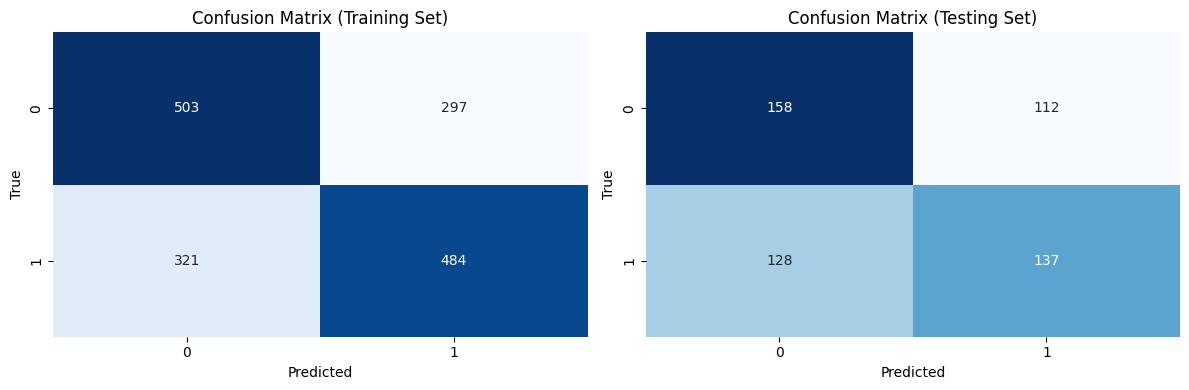

In [33]:
y_train_pred = best_nb_optuna.predict(X_train)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Testing set
y_test_pred = best_nb_optuna.predict(X_test)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix (Training Set)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Testing set
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix (Testing Set)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

Test Accuracy: 55.14%
Train Accuracy: 61.50%
Test Precision: 55.02%
Train Precision: 61.97%
Test Recall: 51.70%
Train Recall: 60.12%
Test_specificity: 58.52%
Train_specificity: 62.88%
f1_score: 53.31%
f1_score: 61.03%
AUC value: 0.58


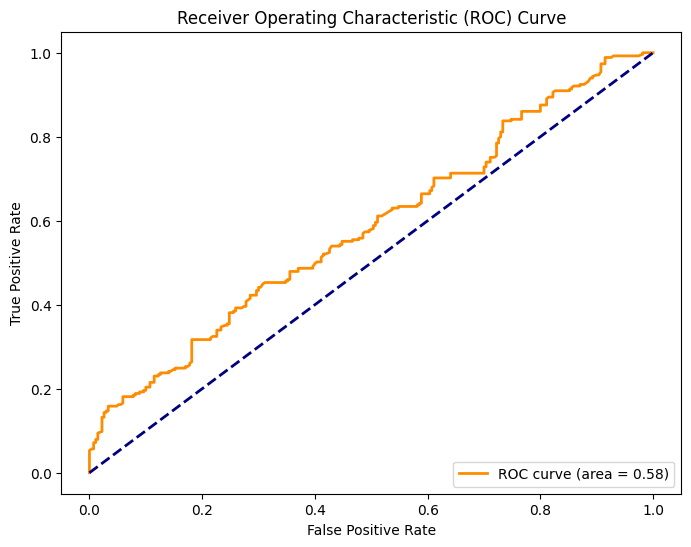

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

accuracy = (conf_matrix_test[0, 0] + conf_matrix_test[1, 1]) / np.sum(conf_matrix_test)
print(f"Test Accuracy: {accuracy:.2%}")

accuracy = (conf_matrix_train[0, 0] + conf_matrix_train[1, 1]) / np.sum(conf_matrix_train)
print(f"Train Accuracy: {accuracy:.2%}")

Test_precision = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[0, 1])
print(f"Test Precision: {Test_precision:.2%}")

Train_precision = conf_matrix_train[1, 1] / (conf_matrix_train[1, 1] + conf_matrix_train[0, 1])
print(f"Train Precision: {Train_precision:.2%}")

Test_recall = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[1, 0])
print(f"Test Recall: {Test_recall:.2%}")

Train_recall = conf_matrix_train[1, 1] / (conf_matrix_train[1, 1] + conf_matrix_train[1, 0])
print(f"Train Recall: {Train_recall:.2%}")

Test_specificity = conf_matrix_test[0, 0] / (conf_matrix_test[0, 0] + conf_matrix_test[0, 1])
print(f"Test_specificity: {Test_specificity:.2%}")

Train_specificity = conf_matrix_train[0, 0] / (conf_matrix_train[0, 0] + conf_matrix_train[0, 1])
print(f"Train_specificity: {Train_specificity:.2%}")

f1_score_Test = 2 * (Test_precision * Test_recall) / (Test_precision + Test_recall)
print(f"f1_score: {f1_score_Test:.2%}")

f1_score_Train = 2 * (Train_precision * Train_recall) / (Train_precision + Train_recall)
print(f"f1_score: {f1_score_Train:.2%}")

auc_value = roc_auc_score(y_test, best_nb_optuna.predict_proba(X_test)[:, 1])
print(f"AUC value: {auc_value:.2f}")

fpr, tpr, _ = roc_curve(y_test, best_nb_optuna.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [35]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_nb_optuna, X, y, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))

cv_scores = cross_val_score(best_nb_optuna, X, y, cv=10)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))


Cross-validation scores:  [0.54439252 0.53971963 0.53971963 0.51168224 0.51401869]
Mean cross-validation score:  0.5299065420560748
Cross-validation scores:  [0.54672897 0.54205607 0.53271028 0.53271028 0.51869159 0.55140187
 0.4953271  0.52336449 0.50934579 0.52336449]
Mean cross-validation score:  0.5275700934579439


# **KNeighborsClassifier**

In [36]:
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

param_distributions_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

random_search_knn = RandomizedSearchCV(
    estimator=KNeighborsClassifier(),
    param_distributions=param_distributions_knn,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search_knn.fit(X_train, y_train)
print("Best Hyperparameters from RandomizedSearchCV:", random_search_knn.best_params_)

best_knn_random_search = KNeighborsClassifier(**random_search_knn.best_params_)
best_knn_random_search.fit(X_train, y_train)
accuracy_random_search = best_knn_random_search.score(X_test, y_test)
print("Test Accuracy with RandomizedSearchCV Tuning:", accuracy_random_search)
import optuna

def objective_knn(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 3, 11, step=2)
    weights = trial.suggest_categorical('weights', ['uniform', 'distance'])
    metric = trial.suggest_categorical('metric', ['euclidean', 'manhattan'])

    model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric)

    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

    return score

study_knn = optuna.create_study(direction='maximize')
study_knn.optimize(objective_knn, n_trials=100)

print("Best Hyperparameters from Optuna:", study_knn.best_params)

best_knn_optuna = KNeighborsClassifier(**study_knn.best_params)
best_knn_optuna.fit(X_train, y_train)
accuracy_optuna = best_knn_optuna.score(X_test, y_test)
print("Test Accuracy with Optuna Tuning:", accuracy_optuna)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[I 2024-08-07 17:15:59,779] A new study created in memory with name: no-name-5a0cb68d-c7ad-4a83-99a7-d090996a8094
[I 2024-08-07 17:15:59,850] Trial 0 finished with value: 0.7881619937694704 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 0 with value: 0.7881619937694704.


Best Hyperparameters from RandomizedSearchCV: {'weights': 'distance', 'n_neighbors': 9, 'metric': 'manhattan'}
Test Accuracy with RandomizedSearchCV Tuning: 0.8261682242990654


[I 2024-08-07 17:15:59,978] Trial 1 finished with value: 0.7900311526479751 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 1 with value: 0.7900311526479751.
[I 2024-08-07 17:16:00,082] Trial 2 finished with value: 0.6890965732087228 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'metric': 'euclidean'}. Best is trial 1 with value: 0.7900311526479751.
[I 2024-08-07 17:16:00,263] Trial 3 finished with value: 0.7165109034267912 and parameters: {'n_neighbors': 7, 'weights': 'uniform', 'metric': 'manhattan'}. Best is trial 1 with value: 0.7900311526479751.
[I 2024-08-07 17:16:00,297] Trial 4 finished with value: 0.7894080996884735 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'euclidean'}. Best is trial 1 with value: 0.7900311526479751.
[I 2024-08-07 17:16:00,421] Trial 5 finished with value: 0.7956386292834892 and parameters: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'manhattan'}. Best is trial 5 wit

Best Hyperparameters from Optuna: {'n_neighbors': 11, 'weights': 'distance', 'metric': 'manhattan'}
Test Accuracy with Optuna Tuning: 0.822429906542056


Accuracy: 0.822429906542056
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       270
           1       0.84      0.79      0.82       265

    accuracy                           0.82       535
   macro avg       0.82      0.82      0.82       535
weighted avg       0.82      0.82      0.82       535



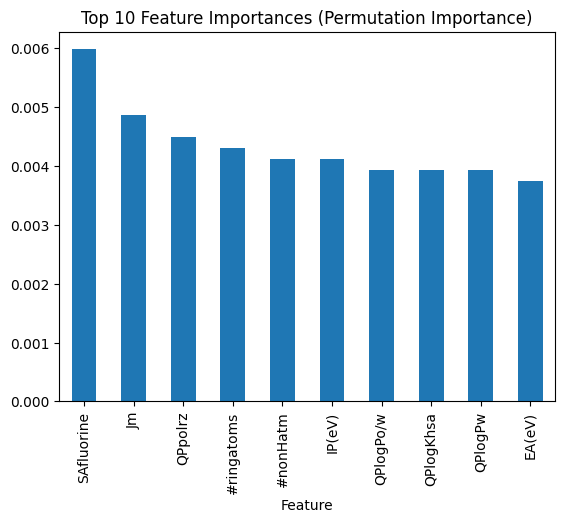

In [37]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score, classification_report

y_pred_knn = best_knn_optuna.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_knn)}")
print(classification_report(y_test, y_pred_knn))

result = permutation_importance(best_knn_optuna, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

importances = result.importances_mean
feature_names = X.columns

importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False).head(10)

importances_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Feature Importances (Permutation Importance)")
plt.show()


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

top_features = importances_df['Feature'].tolist()

if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=feature_names)
    X_test = pd.DataFrame(X_test, columns=feature_names)

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

best_knn_optuna.fit(X_train_top, y_train)

y_pred = best_knn_optuna.predict(X_test_top)

conf_matrix_test = confusion_matrix(y_test, y_pred)
conf_matrix_train = confusion_matrix(y_train, best_knn_optuna.predict(X_train_top))

accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train = accuracy_score(y_train, best_knn_optuna.predict(X_train_top))

test_precision = precision_score(y_test, y_pred, average='binary')
train_precision = precision_score(y_train, best_knn_optuna.predict(X_train_top), average='binary')

test_recall = recall_score(y_test, y_pred, average='binary')
train_recall = recall_score(y_train, best_knn_optuna.predict(X_train_top), average='binary')

test_specificity = conf_matrix_test[0, 0] / (conf_matrix_test[0, 0] + conf_matrix_test[0, 1])
train_specificity = conf_matrix_train[0, 0] / (conf_matrix_train[0, 0] + conf_matrix_train[0, 1])

f1_score_test = f1_score(y_test, y_pred, average='binary')
f1_score_train = f1_score(y_train, best_knn_optuna.predict(X_train_top), average='binary')

# Print metrics
print(f"Test Accuracy: {accuracy_test:.2%}")
print(f"Train Accuracy: {accuracy_train:.2%}")

print(f"Test Precision: {test_precision:.2%}")
print(f"Train Precision: {train_precision:.2%}")

print(f"Test Recall: {test_recall:.2%}")
print(f"Train Recall: {train_recall:.2%}")

print(f"Test Specificity: {test_specificity:.2%}")
print(f"Train Specificity: {train_specificity:.2%}")

print(f"F1 Score (Test): {f1_score_test:.2%}")
print(f"F1 Score (Train): {f1_score_train:.2%}")

Test Accuracy: 80.93%
Train Accuracy: 87.91%
Test Precision: 81.47%
Train Precision: 90.79%
Test Recall: 79.62%
Train Recall: 84.47%
Test Specificity: 82.22%
Train Specificity: 91.38%
F1 Score (Test): 80.53%
F1 Score (Train): 87.52%


AUC value: 0.88


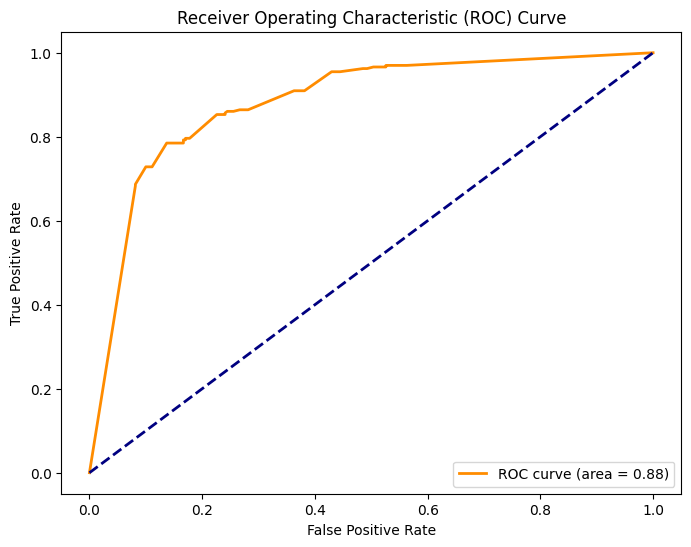

In [39]:
y_prob = best_knn_optuna.predict_proba(X_test_top)[:, 1]

if len(np.unique(y_test)) == 2:
    auc_value = roc_auc_score(y_test, y_prob)
    print(f"AUC value: {auc_value:.2f}")

    fpr, tpr, _ = roc_curve(y_test, y_prob)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()


In [40]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_knn_optuna, X, y, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))

cv_scores = cross_val_score(best_knn_optuna, X, y, cv=10)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))


Cross-validation scores:  [0.80373832 0.75934579 0.85747664 0.85046729 0.84813084]
Mean cross-validation score:  0.8238317757009346
Cross-validation scores:  [0.8271028  0.79439252 0.73364486 0.78037383 0.81308411 0.89252336
 0.74766355 0.90654206 0.77102804 0.90654206]
Mean cross-validation score:  0.8172897196261684


# **Support Vector Machine**

In [41]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import optuna

param_distributions = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

random_search = RandomizedSearchCV(
    estimator=SVC(random_state=42),
    param_distributions=param_distributions,
    n_iter=10,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)
print("Best Hyperparameters from RandomizedSearchCV:", random_search.best_params_)

def objective(trial):
    C = trial.suggest_loguniform('C', 0.1, 100)
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'sigmoid'])

    model = SVC(C=C, gamma=gamma, kernel=kernel, random_state=42)

    score = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy').mean()

    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

print("Best Hyperparameters from Optuna:", study.best_params)

best_svm_random_search = SVC(**random_search.best_params_, random_state=42)
best_svm_random_search.fit(X_train, y_train)
accuracy_random_search = best_svm_random_search.score(X_test, y_test)
print("Test Accuracy with RandomizedSearchCV Tuning:", accuracy_random_search)

best_svm_optuna = SVC(**study.best_params, random_state=42)
best_svm_optuna.fit(X_train, y_train)
accuracy_optuna = best_svm_optuna.score(X_test, y_test)
print("Test Accuracy with Optuna Tuning:", accuracy_optuna)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[I 2024-08-07 17:18:08,135] A new study created in memory with name: no-name-9dd9c046-5dce-4db5-9255-0b72d59b9d5f


Best Hyperparameters from RandomizedSearchCV: {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}


[I 2024-08-07 17:18:08,497] Trial 0 finished with value: 0.573208722741433 and parameters: {'C': 0.21164808896270965, 'gamma': 'scale', 'kernel': 'sigmoid'}. Best is trial 0 with value: 0.573208722741433.
[I 2024-08-07 17:18:15,182] Trial 1 finished with value: 0.6591900311526481 and parameters: {'C': 8.734417901299919, 'gamma': 'scale', 'kernel': 'linear'}. Best is trial 1 with value: 0.6591900311526481.
[I 2024-08-07 17:18:15,437] Trial 2 finished with value: 0.7894080996884735 and parameters: {'C': 13.618067059966496, 'gamma': 'scale', 'kernel': 'rbf'}. Best is trial 2 with value: 0.7894080996884735.
[I 2024-08-07 17:18:15,741] Trial 3 finished with value: 0.5389408099688473 and parameters: {'C': 1.1769019800565872, 'gamma': 'auto', 'kernel': 'sigmoid'}. Best is trial 2 with value: 0.7894080996884735.
[I 2024-08-07 17:18:15,935] Trial 4 finished with value: 0.7869158878504673 and parameters: {'C': 57.696610238167565, 'gamma': 'auto', 'kernel': 'poly'}. Best is trial 2 with value: 0.

Best Hyperparameters from Optuna: {'C': 36.93443257040854, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy with RandomizedSearchCV Tuning: 0.8355140186915888
Test Accuracy with Optuna Tuning: 0.8336448598130841


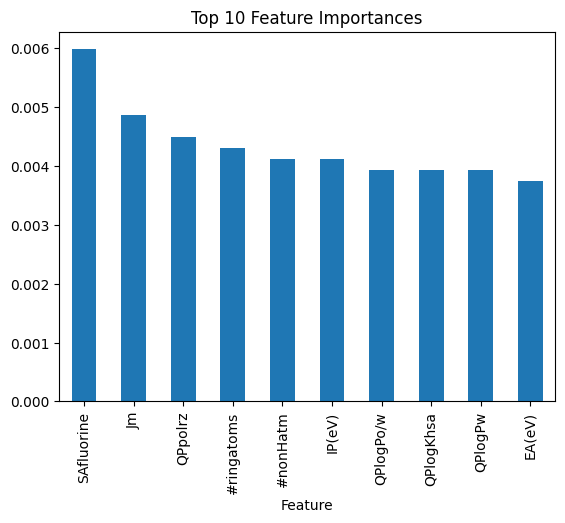

In [42]:
import pandas as pd
df = pd.DataFrame({
    'Feature': ['A', 'B', 'C'],
    'Importance': [0.5, 0.3, 0.2]
})

feature_names = df['Feature']
row = df.iloc[0]
row = df.iloc[0]

column = df.loc[:, 'Feature']

importances_df.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title("Top 10 Feature Importances")
plt.show()

In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

top_features = importances_df['Feature'].tolist()

if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=feature_names)
    X_test = pd.DataFrame(X_test, columns=feature_names)

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

best_svm_top_features = SVC(**study.best_params, random_state=42)
best_svm_top_features.fit(X_train_top, y_train)

y_pred_top = best_svm_top_features.predict(X_test_top)

print(f"Accuracy with top 10 features: {accuracy_score(y_test, y_pred_top)}")
print(classification_report(y_test, y_pred_top))

pickle_filename = 'svm_top_features_model.pkl'
with open(pickle_filename, 'wb') as file:
    pickle.dump(best_svm_top_features, file)

print(f'Model saved as {pickle_filename}')

Accuracy with top 10 features: 0.7457943925233644
              precision    recall  f1-score   support

           0       0.74      0.77      0.75       270
           1       0.76      0.72      0.74       265

    accuracy                           0.75       535
   macro avg       0.75      0.75      0.75       535
weighted avg       0.75      0.75      0.75       535

Model saved as svm_top_features_model.pkl


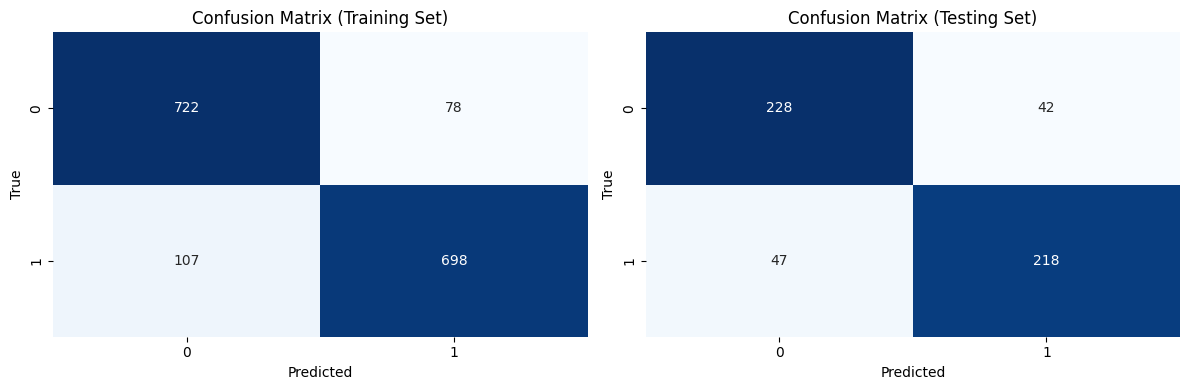

In [44]:
y_train_pred = best_svm_optuna.predict(X_train)
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Testing set
y_test_pred = best_svm_optuna.predict(X_test)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[0])
axes[0].set_title('Confusion Matrix (Training Set)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Testing set
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False, ax=axes[1])
axes[1].set_title('Confusion Matrix (Testing Set)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

plt.tight_layout()
plt.show()

Test Accuracy: 74.58%
Train Accuracy: 80.81%
Test Precision: 75.70%
Train Precision: 82.40%
Test Recall: 71.70%
Train Recall: 78.51%
Test Specificity: 77.41%
Train Specificity: 83.12%
Test F1 Score: 73.64%
Train F1 Score: 80.41%
AUC value: 0.80


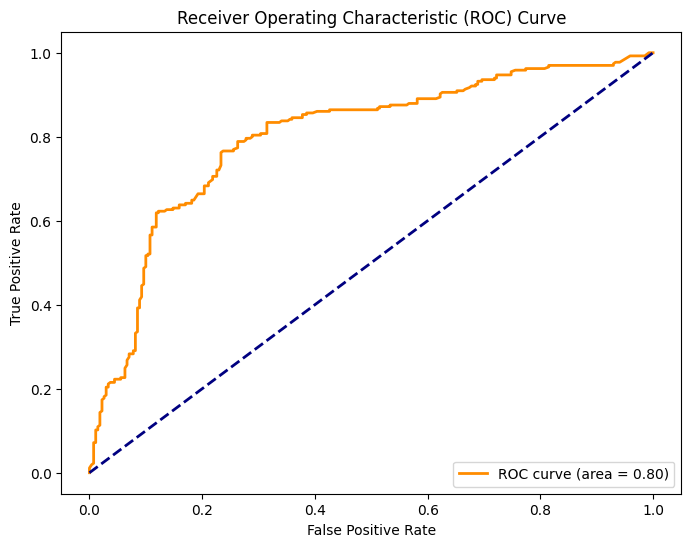

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

best_svm_top_features = SVC(probability=True, **study.best_params, random_state=42)
best_svm_top_features.fit(X_train_top, y_train)

y_pred_test = best_svm_top_features.predict(X_test_top)
y_pred_train = best_svm_top_features.predict(X_train_top)

conf_matrix_test = confusion_matrix(y_test, y_pred_test)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

accuracy_test = (conf_matrix_test[0, 0] + conf_matrix_test[1, 1]) / np.sum(conf_matrix_test)
accuracy_train = (conf_matrix_train[0, 0] + conf_matrix_train[1, 1]) / np.sum(conf_matrix_train)
print(f"Test Accuracy: {accuracy_test:.2%}")
print(f"Train Accuracy: {accuracy_train:.2%}")

precision_test = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[0, 1])
precision_train = conf_matrix_train[1, 1] / (conf_matrix_train[1, 1] + conf_matrix_train[0, 1])
print(f"Test Precision: {precision_test:.2%}")
print(f"Train Precision: {precision_train:.2%}")

recall_test = conf_matrix_test[1, 1] / (conf_matrix_test[1, 1] + conf_matrix_test[1, 0])
recall_train = conf_matrix_train[1, 1] / (conf_matrix_train[1, 1] + conf_matrix_train[1, 0])
print(f"Test Recall: {recall_test:.2%}")
print(f"Train Recall: {recall_train:.2%}")

specificity_test = conf_matrix_test[0, 0] / (conf_matrix_test[0, 0] + conf_matrix_test[0, 1])
specificity_train = conf_matrix_train[0, 0] / (conf_matrix_train[0, 0] + conf_matrix_train[0, 1])
print(f"Test Specificity: {specificity_test:.2%}")
print(f"Train Specificity: {specificity_train:.2%}")

f1_score_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
f1_score_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
print(f"Test F1 Score: {f1_score_test:.2%}")
print(f"Train F1 Score: {f1_score_train:.2%}")

auc_value = roc_auc_score(y_test, best_svm_top_features.predict_proba(X_test_top)[:, 1])
print(f"AUC value: {auc_value:.2f}")

fpr, tpr, _ = roc_curve(y_test, best_svm_top_features.predict_proba(X_test_top)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(auc_value))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

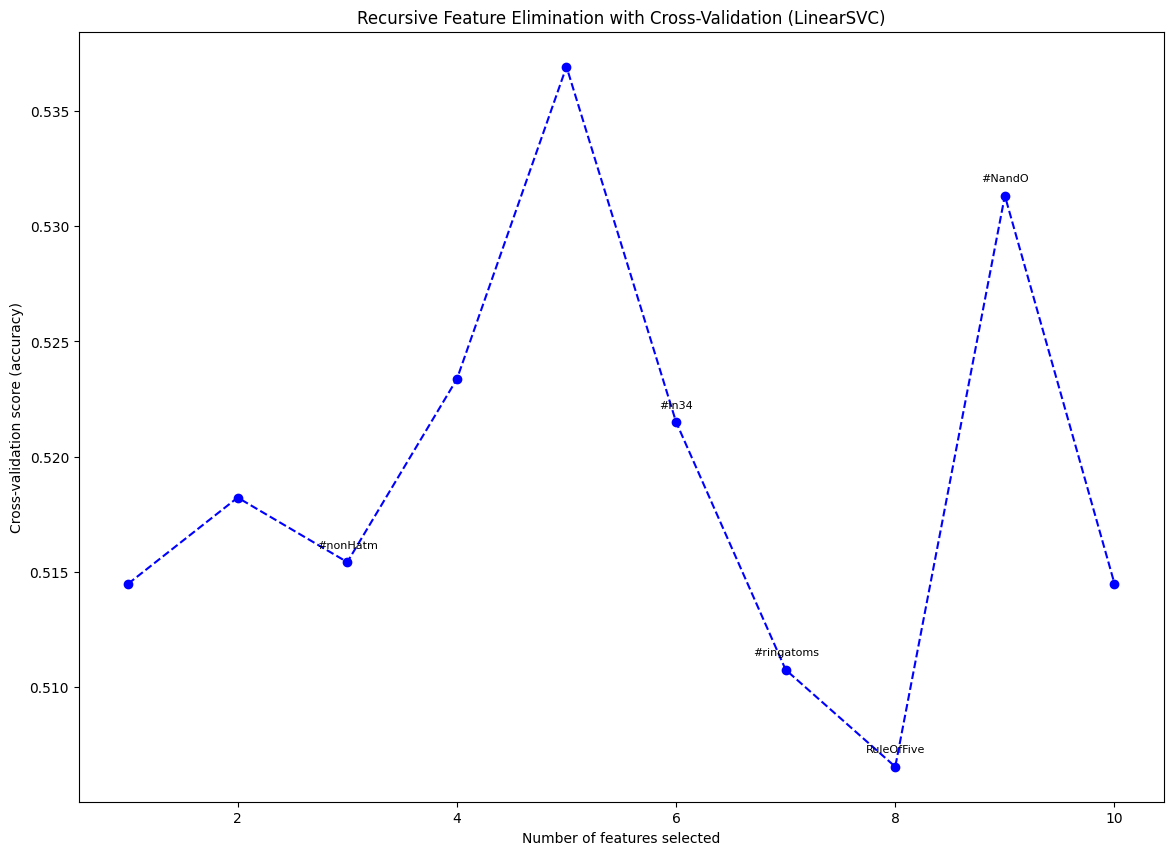

In [48]:
from sklearn.feature_selection import RFECV
from sklearn.svm import LinearSVC
from sklearn.model_selection import StratifiedKFold

linear_svc_params = {k: v for k, v in study.best_params.items() if k in ['C', 'loss']}

linear_svc_model = LinearSVC(**linear_svc_params, random_state=42)

rfecv = RFECV(estimator=linear_svc_model, step=1, cv=StratifiedKFold(3), scoring='accuracy')

rfecv.fit(X_top_features, y)

plt.figure(figsize=(14, 10))
plt.title('Recursive Feature Elimination with Cross-Validation (LinearSVC)')
plt.xlabel('Number of features selected')
plt.ylabel('Cross-validation score (accuracy)')
plt.plot(range(1, len(rfecv.support_) + 1), rfecv.cv_results_['mean_test_score'], marker='o', linestyle='--', color='b')

for i, is_feature in enumerate(rfecv.support_):
    if is_feature:
        plt.annotate(f'{X_top_features.columns[i]}',
                     (i + 1, rfecv.cv_results_['mean_test_score'][i]),
                     textcoords="offset points",
                     xytext=(0, 10),
                     ha='center',
                     fontsize=8)

plt.show()

In [49]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_svm_optuna, X, y, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))

cv_scores = cross_val_score(best_svm_optuna, X, y, cv=10)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))


Cross-validation scores:  [0.67056075 0.62149533 0.67056075 0.61915888 0.67757009]
Mean cross-validation score:  0.6518691588785046
Cross-validation scores:  [0.67757009 0.63551402 0.64485981 0.61214953 0.68224299 0.6588785
 0.57009346 0.69626168 0.58878505 0.75233645]
Mean cross-validation score:  0.6518691588785046
